# Breast Cancer Wisconsin (Diagnostic) Data Set
## *Pràctica MIDA*
### *Roberto Lupu i Arnau Roca*




En aquesta pràctica analitzarem el conjunt de dades extret de kaggle usat per predir si el cancer de mama es benigne o no.
- Per començar farem el preprocessament de dades i justificarem el perquè.
- Aplicarem els mètodes explicats a les classes de teoria al conjunt de dades. Si el
l'algorisme ho requereix, trobarem els millors paràmetres per a l'algorisme. Tot això explicant el procediment
- Interpretarem els resultats obtinguts
- Evaluarem i compararem els diferents resultats obtinguts
- Discutirem quins mètodes son millors que altres i perque



# 1.- Preprocessament

### Importació de les llibreries requerides

In [ ]:
import numpy as np                     # Llibreria matemÃ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
import pandas as pd

%matplotlib inline


Importem les dades del .csv i les previsualitzem.

In [ ]:
df = pd.read_csv("data.csv")
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

Amb el describe tenim una explicació més detallada de cada columna.

In [ ]:
df.describe(include='all')

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
count   5.690000e+02       569   569.000000    569.000000      569.000000   
unique           NaN         2          NaN           NaN             NaN   
top              NaN         B          NaN           NaN             NaN   
freq             NaN       357          NaN           NaN             NaN   
mean    3.037183e+07       NaN    14.127292     19.289649       91.969033   
std     1.250206e+08       NaN     3.524049      4.301036       24.298981   
min     8.670000e+03       NaN     6.981000      9.710000       43.790000   
25%     8.692180e+05       NaN    11.700000     16.170000       75.170000   
50%     9.060240e+05       NaN    13.370000     18.840000       86.240000   
75%     8.813129e+06       NaN    15.780000     21.800000      104.100000   
max     9.113205e+08       NaN    28.110000     39.280000      188.500000   

          area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count    569.000000       569.000000        569.000000      569.000000   
unique          NaN              NaN               NaN             NaN   
top             NaN              NaN               NaN             NaN   
freq            NaN              NaN               NaN             NaN   
mean     654.889104         0.096360          0.104341        0.088799   
std      351.914129         0.014064          0.052813        0.079720   
min      143.500000         0.052630          0.019380        0.000000   
25%      420.300000         0.086370          0.064920        0.029560   
50%      551.100000         0.095870          0.092630        0.061540   
75%      782.700000         0.105300          0.130400        0.130700   
max     2501.000000         0.163400          0.345400        0.426800   

        concave points_mean  ...  texture_worst  perimeter_worst   area_worst  \
count            569.000000  ...     569.000000       569.000000   569.000000   
unique                  NaN  ...            NaN              NaN          NaN   
top                     NaN  ...            NaN              NaN          NaN   
freq                    NaN  ...            NaN              NaN          NaN   
mean               0.048919  ...      25.677223       107.261213   880.583128   
std                0.038803  ...       6.146258        33.602542   569.356993   
min                0.000000  ...      12.020000        50.410000   185.200000   
25%                0.020310  ...      21.080000        84.110000   515.300000   
50%                0.033500  ...      25.410000        97.660000   686.500000   
75%                0.074000  ...      29.720000       125.400000  1084.000000   
max                0.201200  ...      49.540000       251.200000  4254.000000   

        smoothness_worst  compactness_worst  concavity_worst  \
count         569.000000         569.000000       569.000000   
unique               NaN                NaN              NaN   
top                  NaN                NaN              NaN   
freq                 NaN                NaN              NaN   
mean            0.132369           0.254265         0.272188   
std             0.022832           0.157336         0.208624   
min             0.071170           0.027290         0.000000   
25%             0.116600           0.147200         0.114500   
50%             0.131300           0.211900         0.226700   
75%             0.146000           0.339100         0.382900   
max             0.222600           1.058000         1.252000   

        concave points_worst  symmetry_worst  fractal_dimension_worst  \
count             569.000000      569.000000               569.000000   
unique                   NaN             NaN                      NaN   
top                      NaN             NaN                      NaN   
freq                     NaN             NaN                      NaN   
mean                0.114606        0.290076                 0.083946   
std                 0.06

### Valors nuls

Comprovem si hi ha valors nuls

In [ ]:
null_values = df.isnull().values.any()
if null_values == True:
    print("There are some missing values in data")
else:
    print("There are no missing values in the dataset")

There are some missing values in data


Veiem que hi ha valors nuls, anem a veure exactament on estan


In [ ]:
# Comptar valors nuls per columna per veure quins tenim
missing_values = df.isnull().sum()

# Imprimir el nombre de valors nuls per columna
print("Nombre de valors nuls per columna:")
print(missing_values)


Nombre de valors nuls per columna:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
frac

Veiem que es la última columna la que conté valors nuls. La eliminarem ja que no ens aporta cap informació i tornem a comprovar que no tingui valors nuls


In [ ]:
# Separation into data and label
df = df.dropna(axis=1, how='all')

X = df.iloc[:, 2:].to_numpy()  # Exclou les dues primeres columnes
y = df.iloc[:, :2].to_numpy()
print(X.shape)
print(y.shape)

null_values = df.isnull().values.any()
if null_values == True:
    print("There are some missing values in data")
else:
    print("There are no missing values in the dataset")


(569, 30)
(569, 2)
There are no missing values in the dataset


A continuació, dividim les dades segons el seu diagnòstic i printem petites característiques de cada grup (On B fa referencia als tumors benignes i M als malignes).

In [ ]:
boxplotdata = df
groupby_diagnosis = df.groupby('diagnosis')
groupby_diagnosis.describe()

id                                                          \
           count          mean           std     min       25%       50%   
diagnosis                                                                  
B          357.0  2.654382e+07  1.167397e+08  8913.0  874662.0  908916.0   
M          212.0  3.681805e+07  1.378965e+08  8670.0  861345.0  895366.5   

                                   radius_mean             ... symmetry_worst  \
                  75%          max       count       mean  ...            75%   
diagnosis                                                  ...                  
B          8812816.00  911320502.0       357.0  12.146524  ...       0.298300   
M          8911289.75  911296202.0       212.0  17.462830  ...       0.359225   

                  fractal_dimension_worst                               \
              max                   count      mean       std      min   
diagnosis                                                                
B          0.4228                   357.0  0.079442  0.013804  0.05521   
M          0.6638                   212.0  0.091530  0.021553  0.05504   

                                                
                25%      50%       75%     max  
diagnosis                                       
B          0.070090  0.07712  0.085410  0.1486  
M          0.076302  0.08760  0.102625  0.2075  

[2 rows x 248 columns]

### Numerització de dades no numèriques

Una vegada estem segurs de que no tenim cap valor nul, hem de canviar els valors "categòrics" per números. En aquest cas tenim la columna del diagnòstic amb una M o una B depenent de si és "M"aligne o "B"enigne. Nosaltres ho canviarem per 1 si és Maligne i 0 si és Benigne

In [ ]:
#Replace M with 1 and Begnin with 0 (else 0)
# Replace 'M' with 1 and 'B' with 0
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Elimina la primera columna (ID) de df
ids = df.iloc[:, :1]
df = df.iloc[:, 1:]

# Utilitza la resta com a dades X
X = df.iloc[:, 1:].to_numpy()

# Utilitza la columna 'diagnosis' com a dades y
y = df['diagnosis'].to_numpy()
df.head()



diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [ ]:
#exportem les dades sense normalitzar
df.to_csv('dataset_preprocessat.csv', index=False)

### Normalització

Per comprovar que la normalització s'ha realitzat correctament, procedim a imprimir per cada columna els valors de desviació estàndard, el mínim i el màxim

In [ ]:
for i in range(30):
    print('mean:', X[:,i].mean(),'std:',X[:,i].std(),'min',X[:,i].min(),'max',X[:,i].max())


mean: 14.127291739894552 std: 3.520950760711062 min 6.981 max 28.11
mean: 19.289648506151142 std: 4.297254637090421 min 9.71 max 39.28
mean: 91.96903339191564 std: 24.27761929305318 min 43.79 max 188.5
mean: 654.8891036906855 std: 351.60475406323 min 143.5 max 2501.0
mean: 0.0963602811950791 std: 0.014051764066591203 min 0.05263 max 0.1634
mean: 0.10434098418277679 std: 0.05276632912535515 min 0.01938 max 0.3454
mean: 0.0887993158172232 std: 0.07964972534603185 min 0.0 max 0.4268
mean: 0.04891914586994728 std: 0.03876873246147477 min 0.0 max 0.2012
mean: 0.18116186291739894 std: 0.027390180864268532 min 0.106 max 0.304
mean: 0.06279760984182776 std: 0.007054155881537345 min 0.04996 max 0.09744
mean: 0.40517205623901575 std: 0.27706894152536526 min 0.1115 max 2.873
mean: 1.2168534270650264 std: 0.551163426903576 min 0.3602 max 4.885
mean: 2.8660592267135327 std: 2.0200770991455244 min 0.757 max 21.98
mean: 40.337079086116 std: 45.45101341563996 min 6.802 max 542.2
mean: 0.00704097891036

In [ ]:
# Normalitzem
from sklearn import preprocessing

# data mean 0, std 1
scaler = preprocessing.StandardScaler().fit(X)
X2=scaler.transform(X)

for i in range(30):
    print('mean:', X2[:,i].mean(),'std:',X2[:,i].std(),'min',X2[:,i].min(),'max',X2[:,i].max())



mean: -1.3736327053358703e-16 std: 1.0 min -2.0296483039857525 max 3.9712876465451097
mean: 6.868163526679351e-17 std: 1.0000000000000002 min -2.2292485121703924 max 4.651888980771197
mean: -1.2487570048507913e-16 std: 1.0 min -1.984504032720442 max 3.9761298438231054
mean: -2.1853247584888846e-16 std: 1.0 min -1.454443086394449 max 5.250528825265325
mean: -8.366671932500301e-16 std: 1.0 min -3.112084787919981 max 4.770911217069983
mean: 1.8731355072761868e-16 std: 1.0 min -1.6101363424569084 max 4.5684249750356445
mean: 4.9950280194031645e-17 std: 1.0 min -1.1148728439607505 max 4.243588822363918
mean: -4.9950280194031645e-17 std: 1.0 min -1.2618195840825894 max 3.9279296603616616
mean: 1.7482598067911076e-16 std: 1.0 min -2.744117072094631 max 4.4847508562036476
mean: 4.745276618433007e-16 std: 1.0 min -1.8198647800550172 max 4.91091928501904
mean: 2.3726383092165034e-16 std: 1.0 min -1.059924127988667 max 8.906909342399384
mean: -1.123881304365712e-16 std: 0.9999999999999999 min -1.

Si comparem els resultats observem que totes les mitjanes idesviacions estàndard passen de ser aproximadament 0 i 1 respectivament.

In [ ]:
print("Shape de X2:", X2.shape)
print("Shape de df:", df.shape)
columns = df.columns[1:]  # Ignora la columna 'diagnosis' que és l'etiqueta
df_norm = pd.DataFrame(X2, columns=columns)
df_norm.insert(0, 'diagnosis', df['diagnosis'])
df_norm.to_csv('dataset_preprocessat_norm.csv', index=False)



Shape de X2: (569, 30)
Shape de df: (569, 31)


### Columnes irrellevants

In [ ]:

columns = [str(i+1) for i in range(30)]
columnes_originals = df.columns.tolist()
df=pd.DataFrame(data=X2, columns=columns)
df['1']=y


#exportem les dades normalitzades i amb les columnes amb números
#df.to_csv('dataset_preprocessat.csv', index=False)

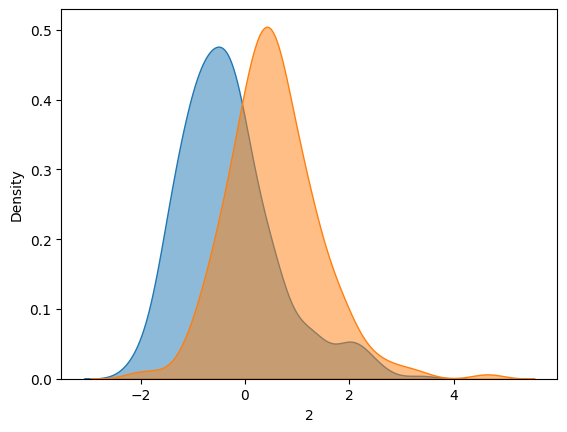

In [ ]:
import seaborn as sns

sns.kdeplot(df[df['1']==0]['2'], fill=True, alpha=0.5, label='Benigne')
sns.kdeplot(df[df['1']==1]['2'], fill=True, alpha=0.5, label='Maligne')
plt.show()

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30'],
      dtype='object')


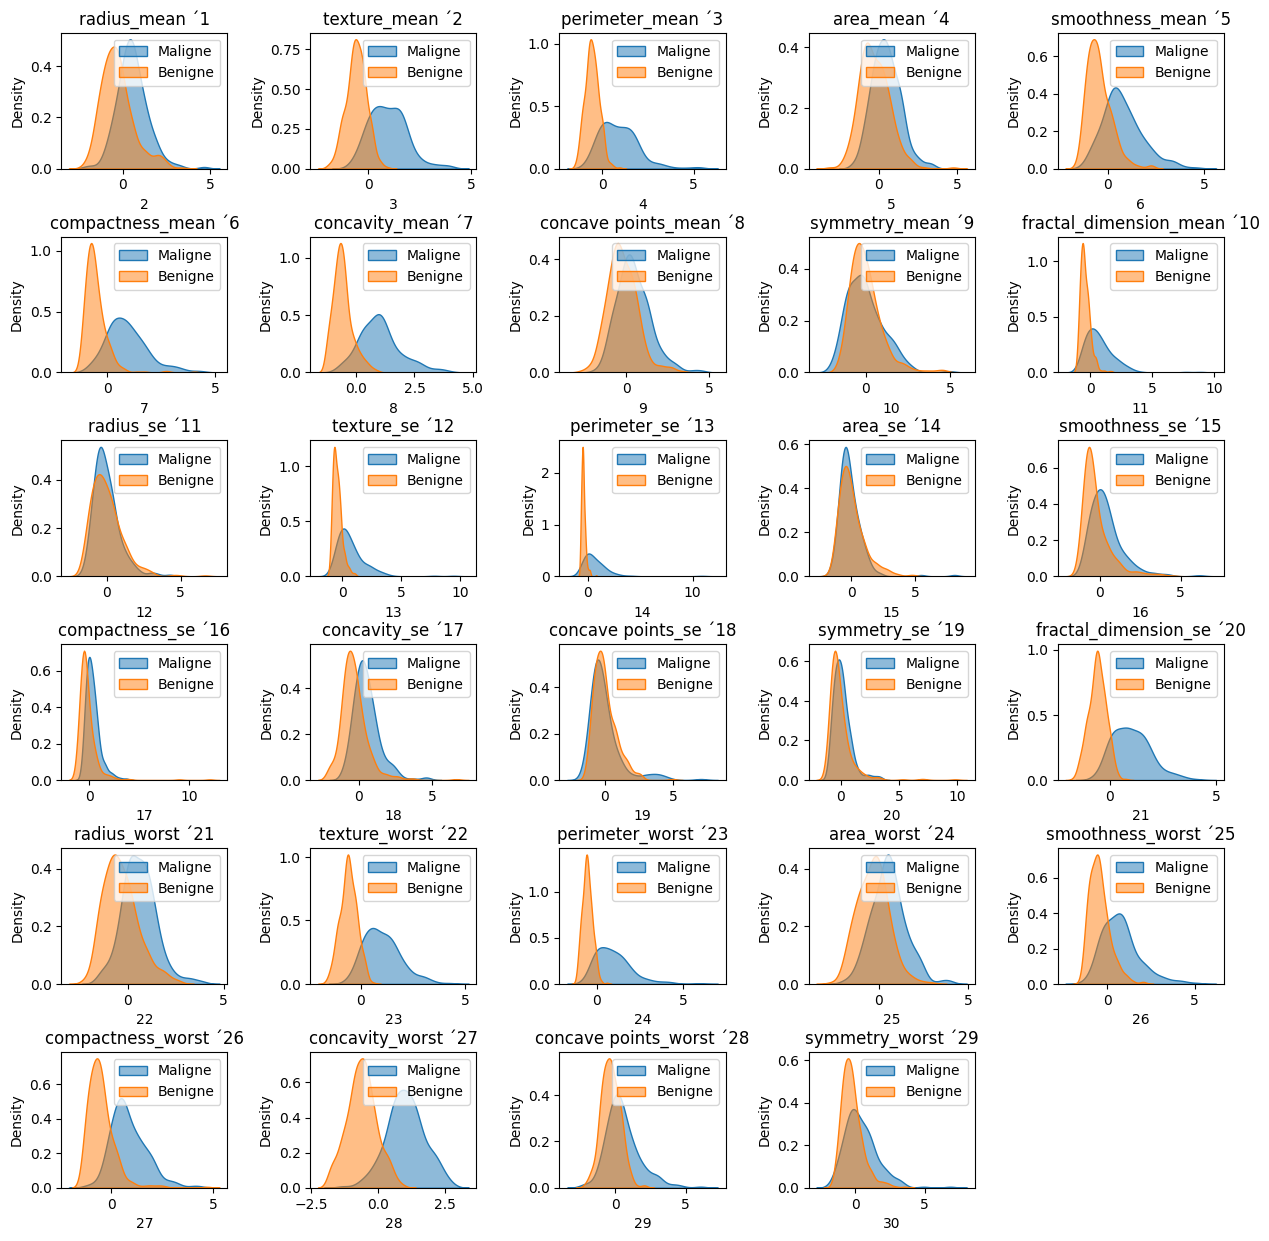

In [ ]:
# It seems that feature 1 does not help to separate data according to labels.
# Let's see the same for all the features

plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
print(df.columns)
for i in range(29):
    plt.subplot(6, 5, i+1)
    sns.kdeplot(df[df['1']==1][str(i+2)], fill=True, alpha=0.5, label='Maligne')
    sns.kdeplot(df[df['1']==0][str(i+2)], fill=True, alpha=0.5, label='Benigne')
    plt.title(f'{columnes_originals[i+1]} ´{i+1}')
    plt.legend()

plt.show()

Boxplot de totes les columnes separant cancers benignes de malignes

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/tools.py:227: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


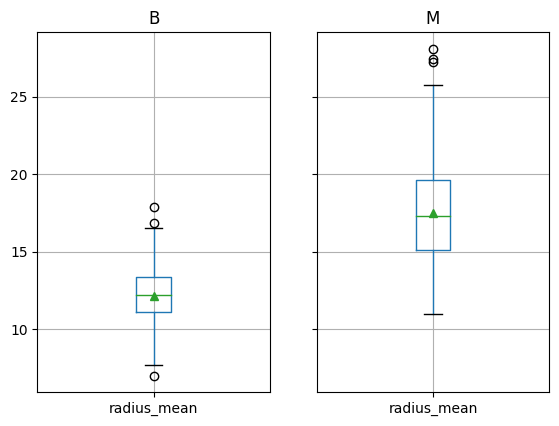

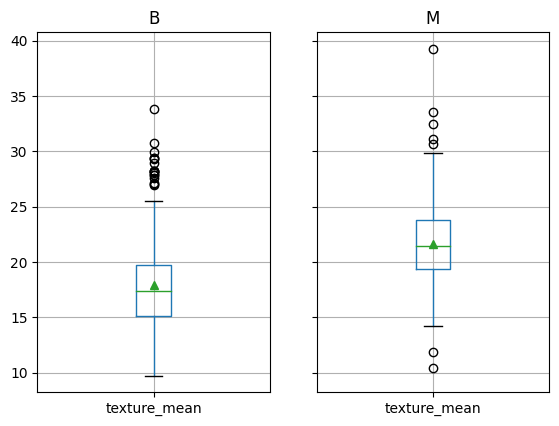

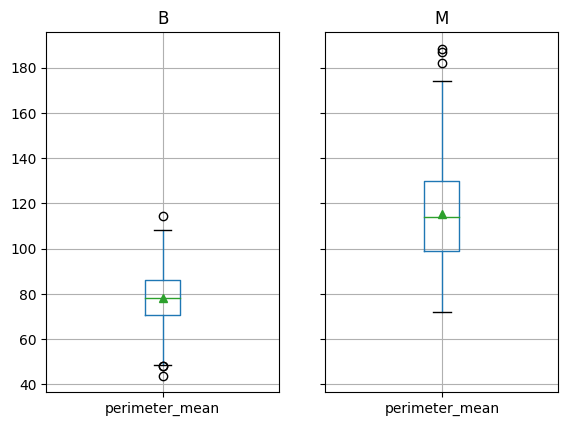

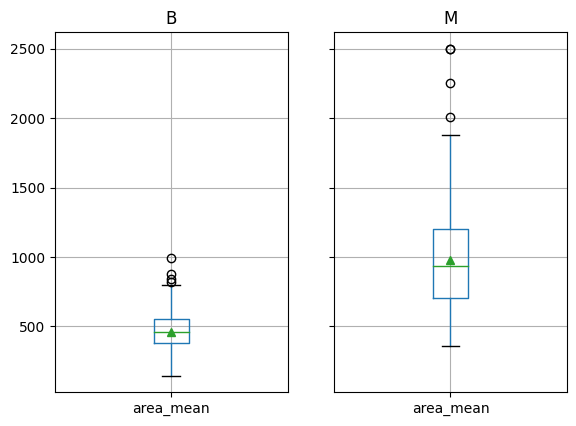

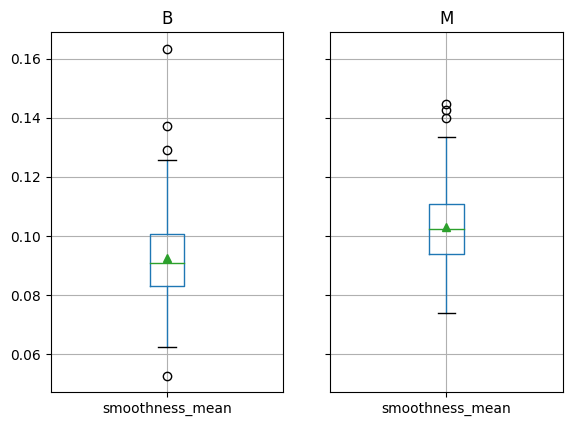

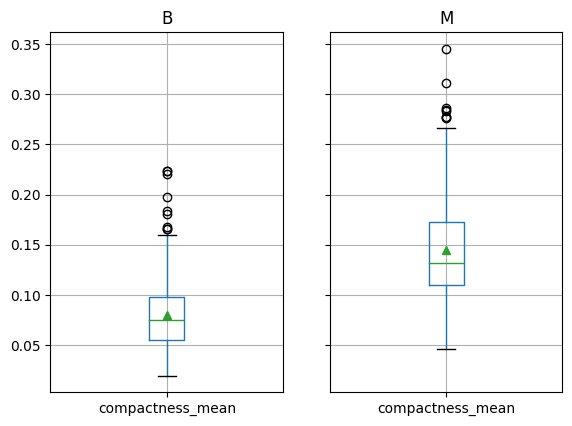

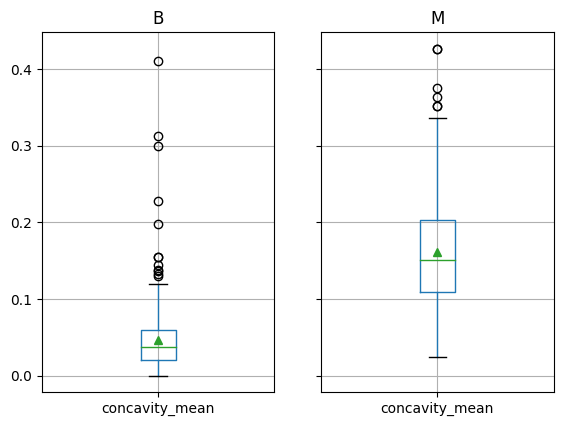

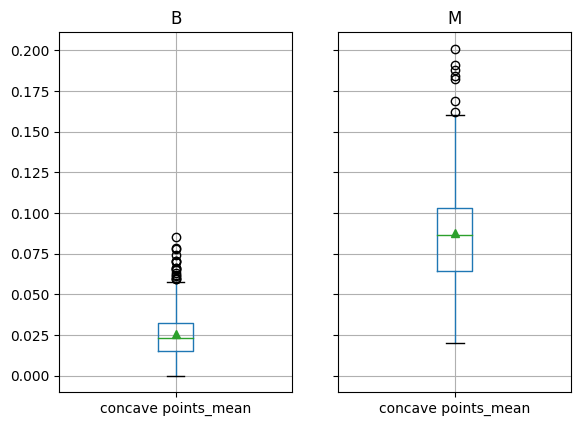

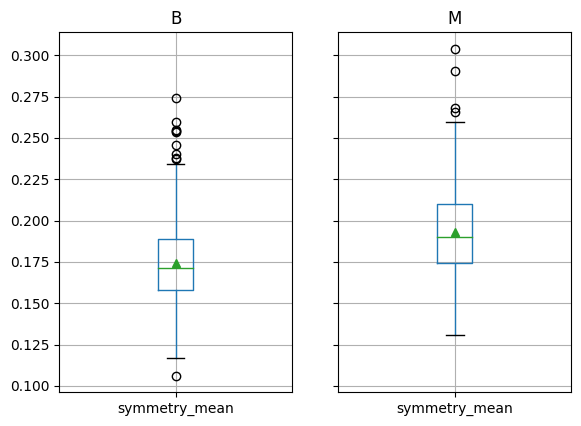

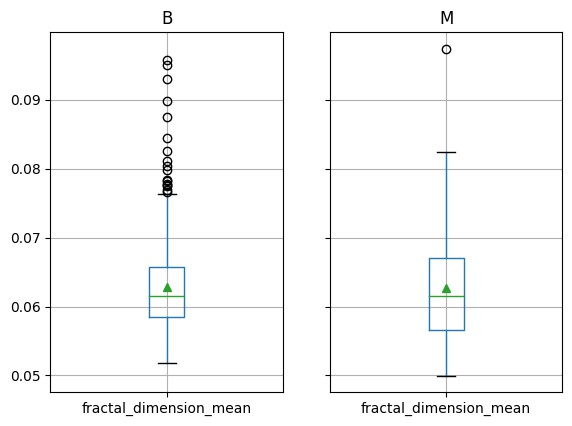

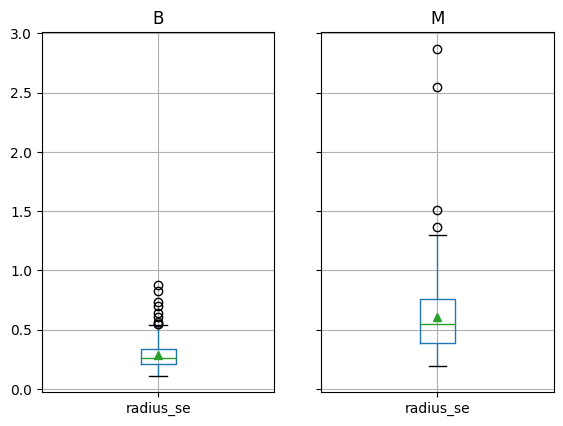

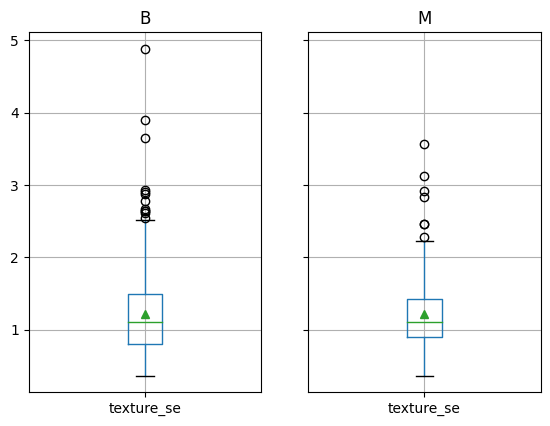

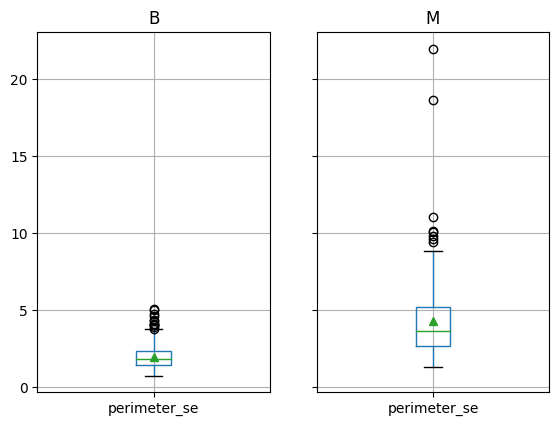

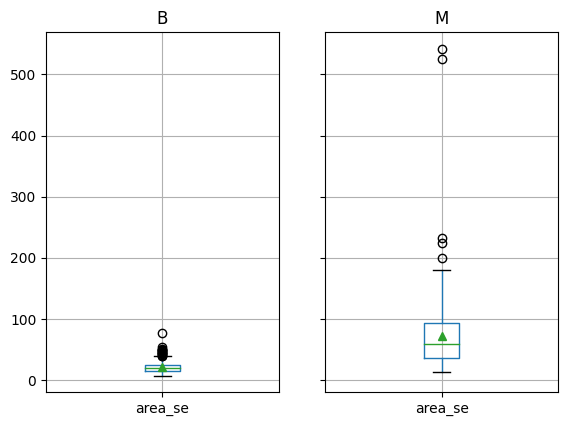

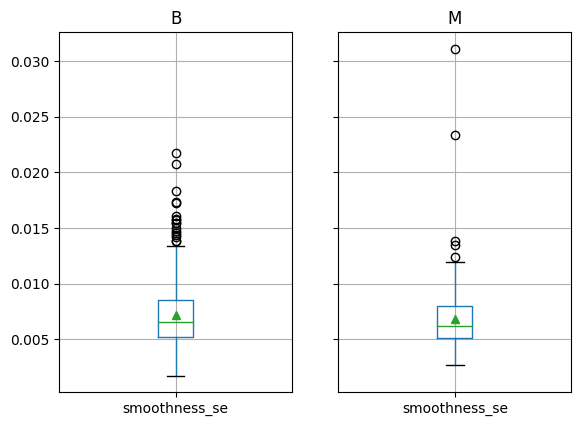

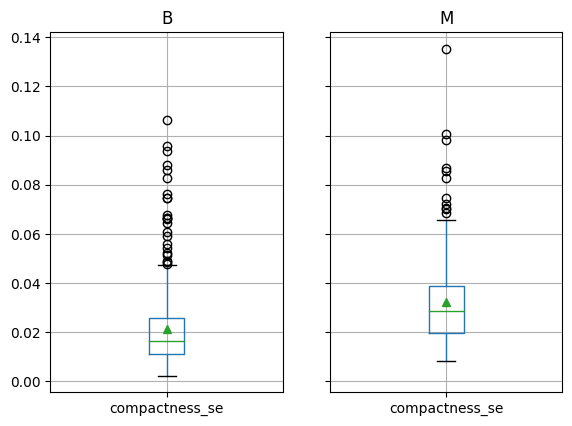

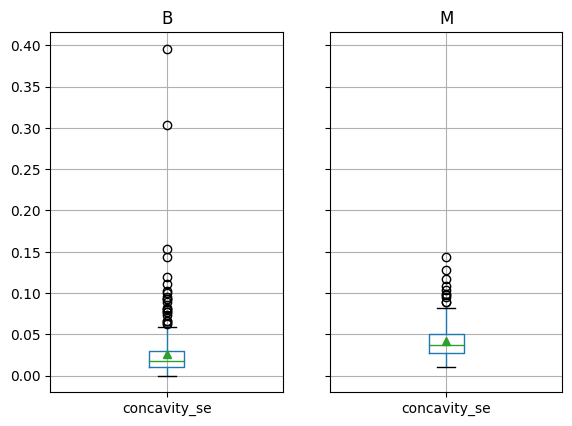

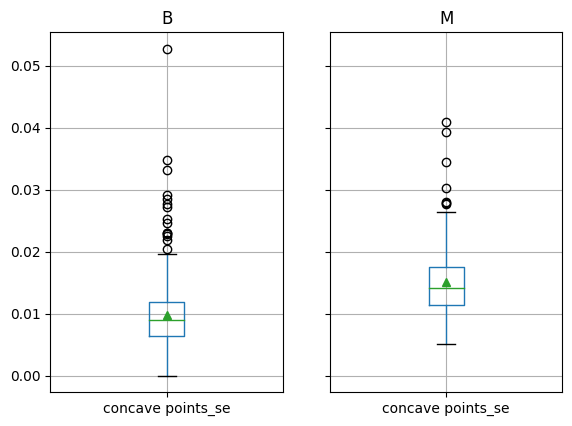

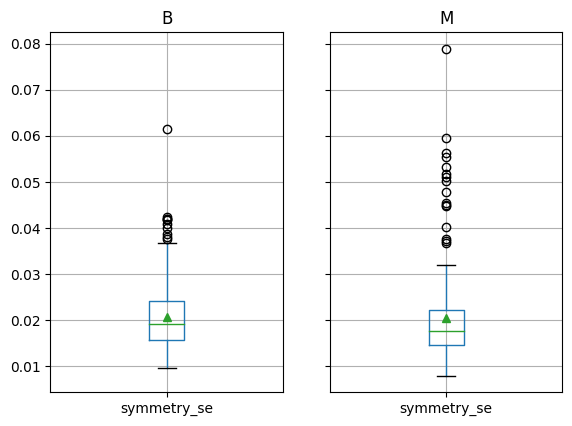

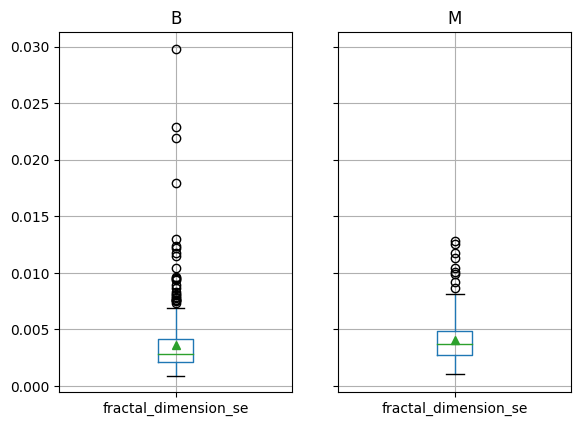

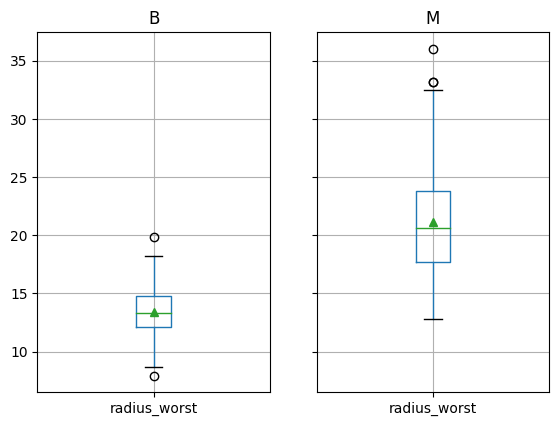

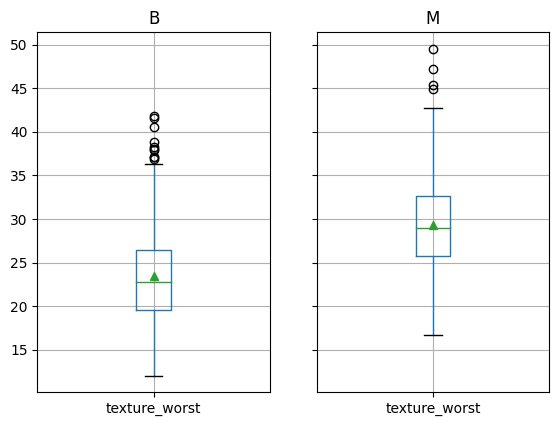

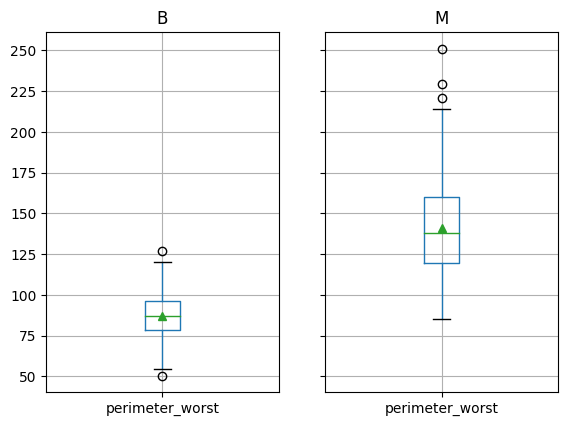

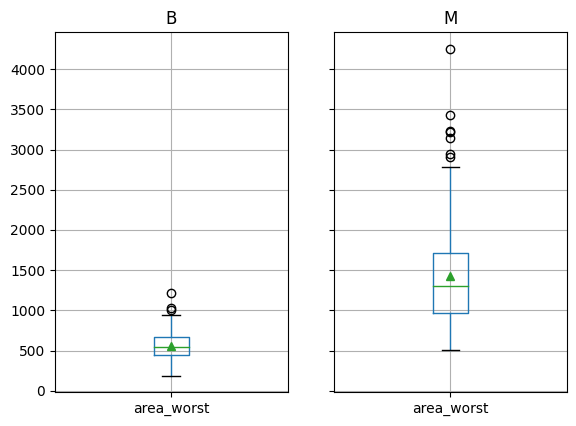

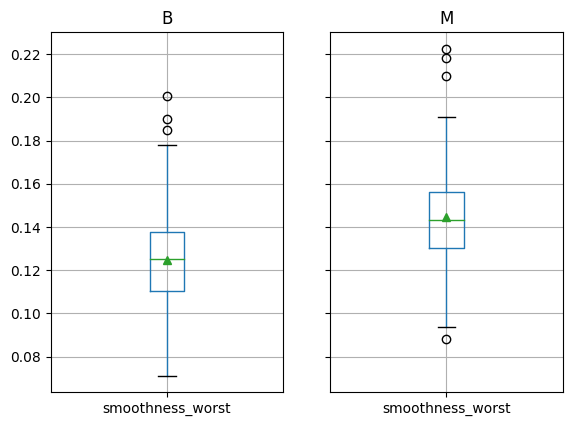

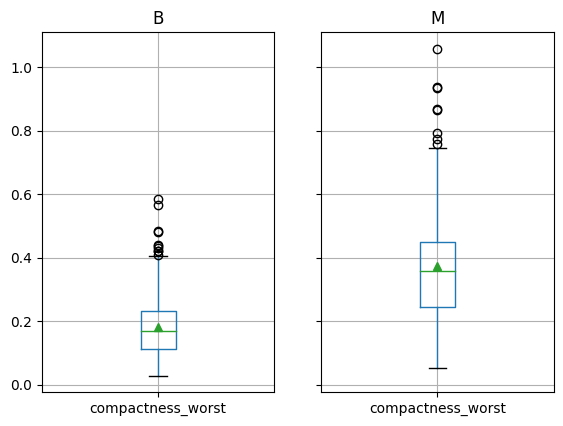

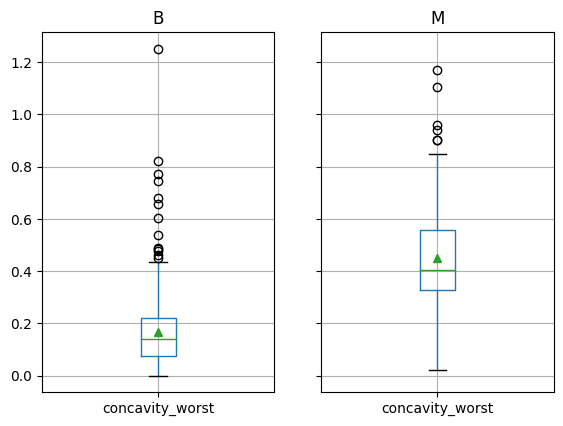

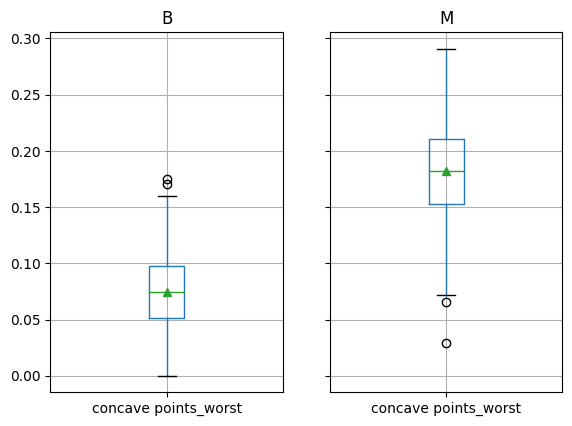

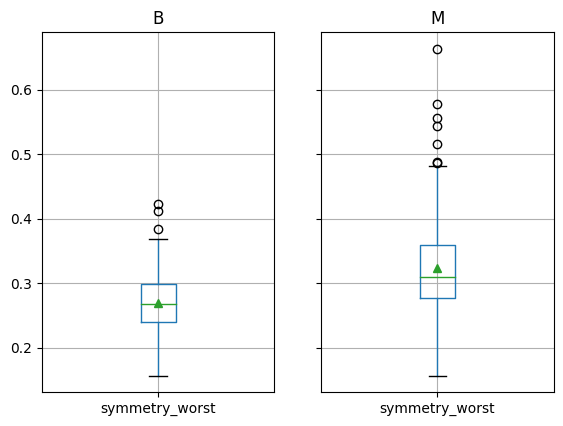

In [ ]:
for i in range(29):

  groupby_diagnosis.boxplot(column=[columnes_originals[i+1]],meanline=False,showmeans=True,return_type='dict')


### Finding outliers

In [ ]:
#Es possible que es necessiti instalar això
!pip install fitter

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 87.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 43.7 MB/s eta 0:00:00
  Created wheel for fitter: filename=fitter-1.6.0-py3-none-any.whl size=26058 sha256=8de68274dc1c5519b17e7e8c22505ad7725a91a403220771097f374f364a286c
  Stored in directory: /root/.cache/pip/wheels/26/f9/51/059fcaf0ba5aafd94463e31b343453c5cf165cea425f25c0f9
Successfully built fitter
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's depe

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions

def fit_distribution(data):
    f = Fitter(data, distributions=get_common_distributions())
    f.fit()
    #f.summary()
    return list(f.get_best(method = 'sumsquare_error').keys())[0]


def fins_outliers_normal(df, column):
  #documentar iqr method
  outliers = pd.DataFrame()
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  outliers = pd.concat([outliers, column_outliers])
  return outliers

def find_outliers_chi_square(df, column, threshold=3):
    chi_square_values = chi2.pdf(df[column], len(df[column]))
    return df[chi_square_values < threshold]

def find_outliers_students_t(df, column, threshold=3):
    _, _, df_params = t.fit(df[column])
    t_values = t.pdf(df[column], df_params)
    return df[t_values < threshold]




In [ ]:
B = df[df['1'] == 0]
M = df[df['1'] == 1]
columns = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

column_types = {
    "B": {},
    "M": {}
}
for i in B.columns[:-1]:
  column_types["B"][columns[int(i)]] = fit_distribution(B[str(int(i)+1)])
for i in M.columns[:-1]:
  column_types["M"][columns[int(i)]] = fit_distribution(M[str(int(i)+1)])

distribution_types = set()
for key in column_types.keys():
  for dist in column_types[key].keys():
    distribution_types.add(column_types[key][dist])
print(distribution_types)

{'cauchy', 'norm', 'rayleigh', 'chi2', 'lognorm', 'gamma'}


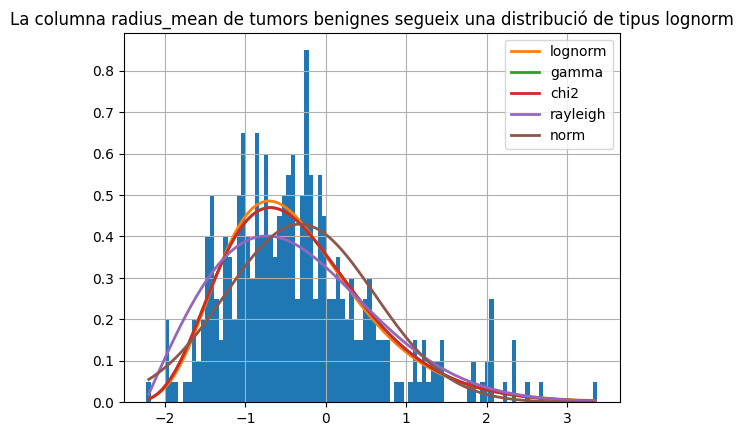

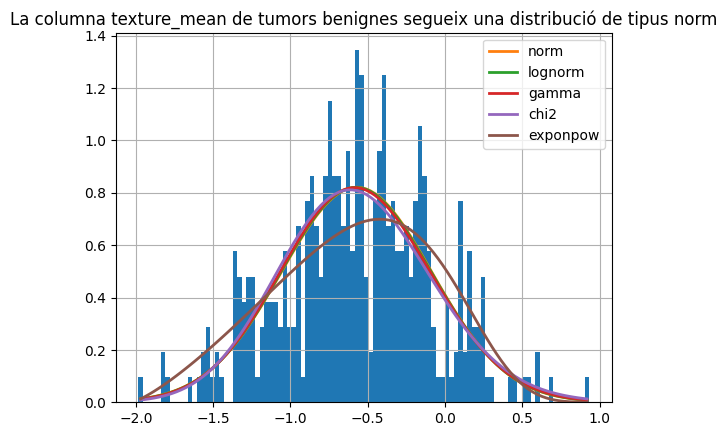

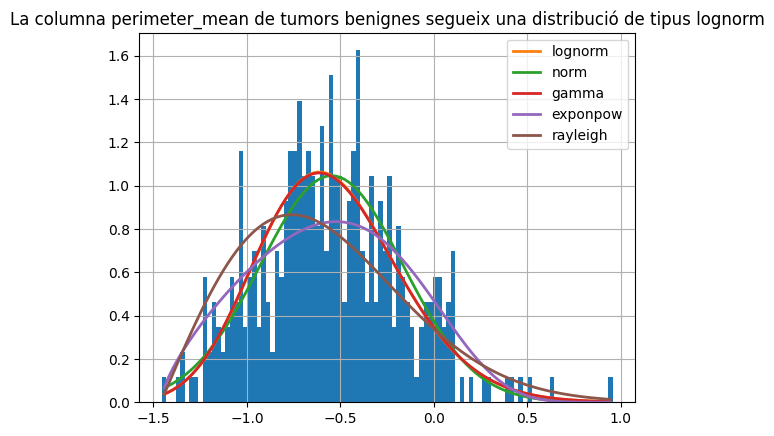

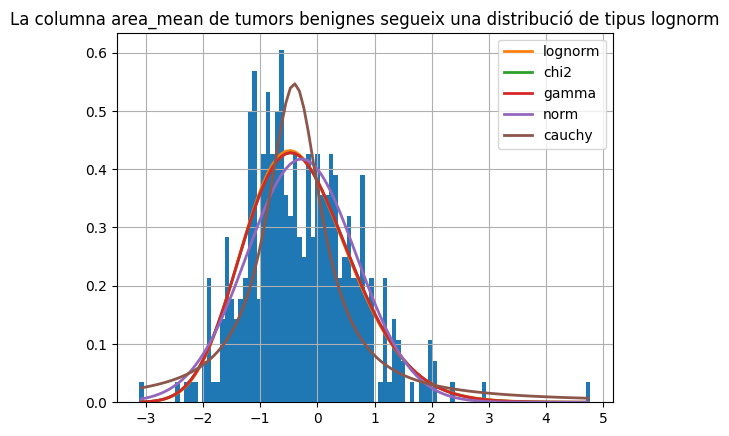

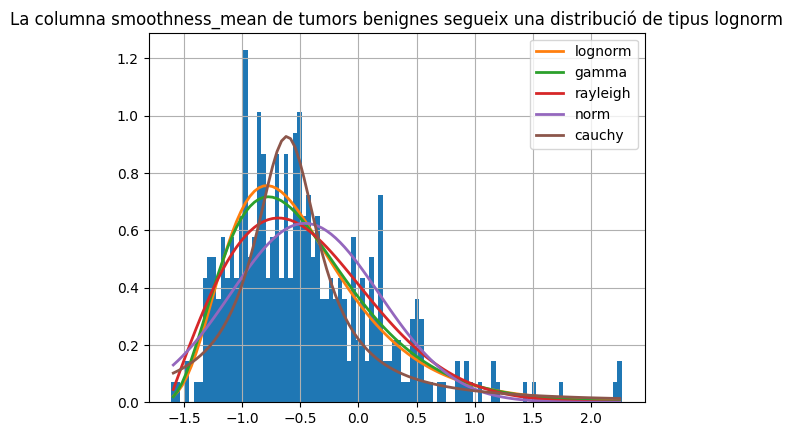

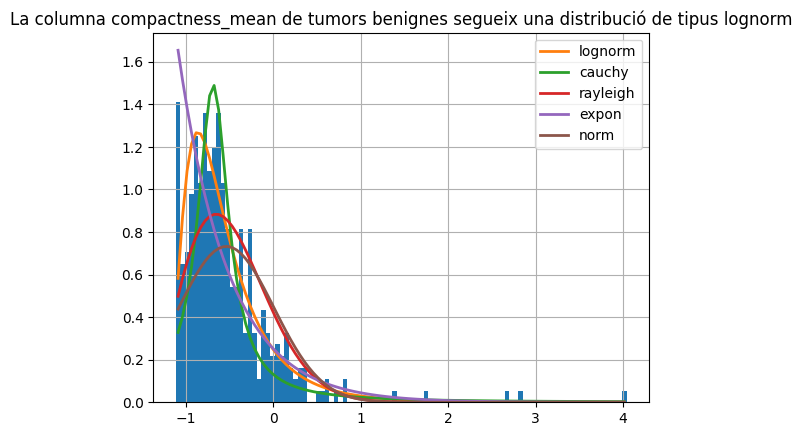

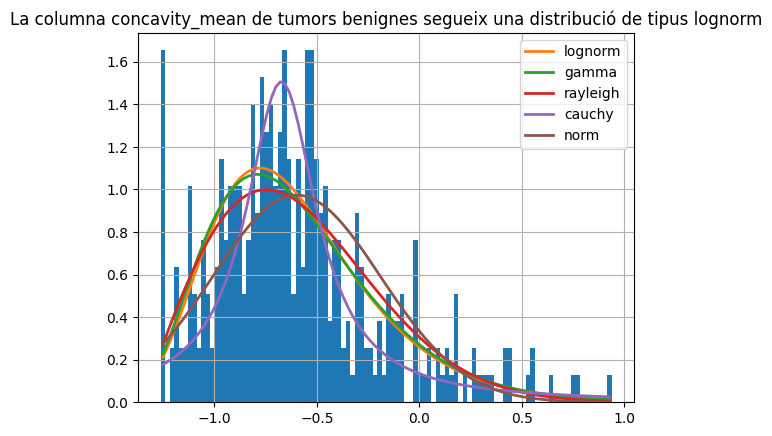

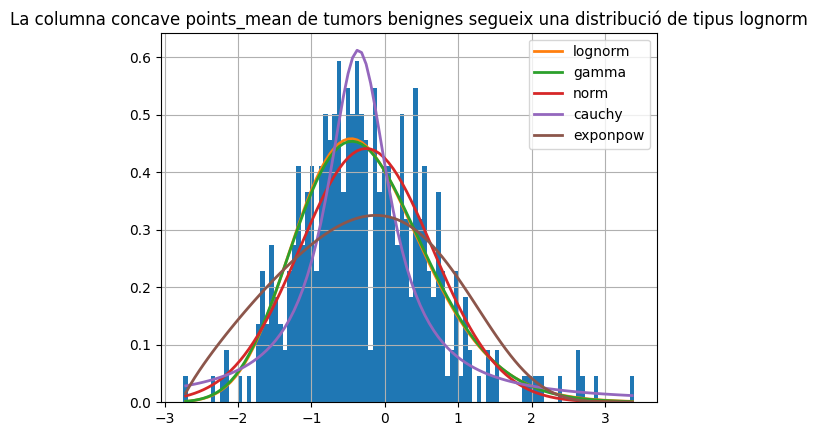

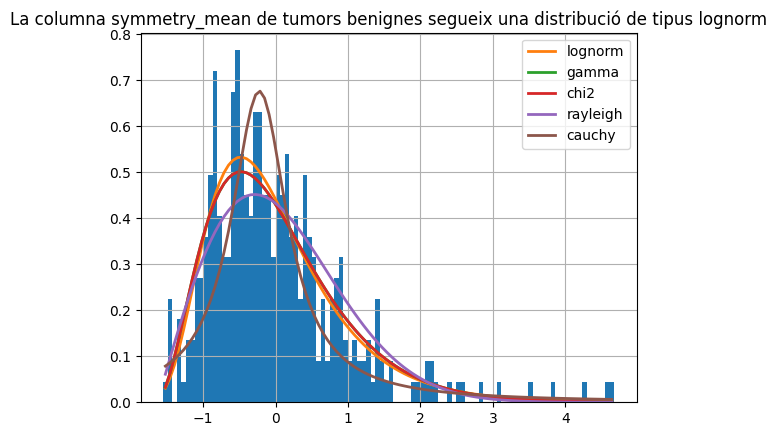

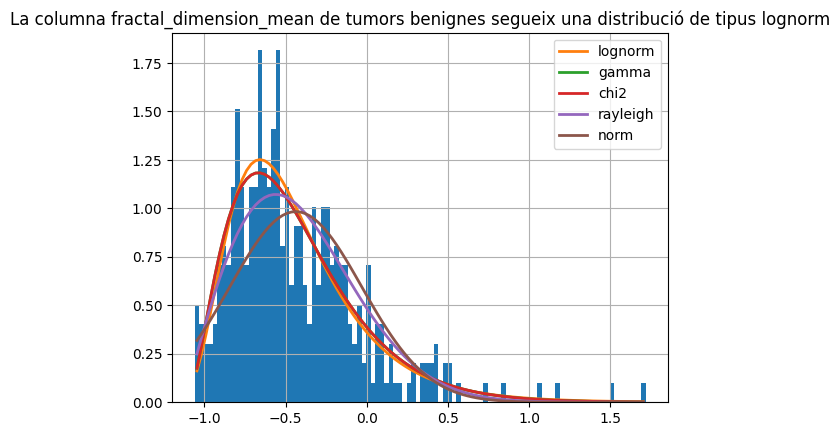

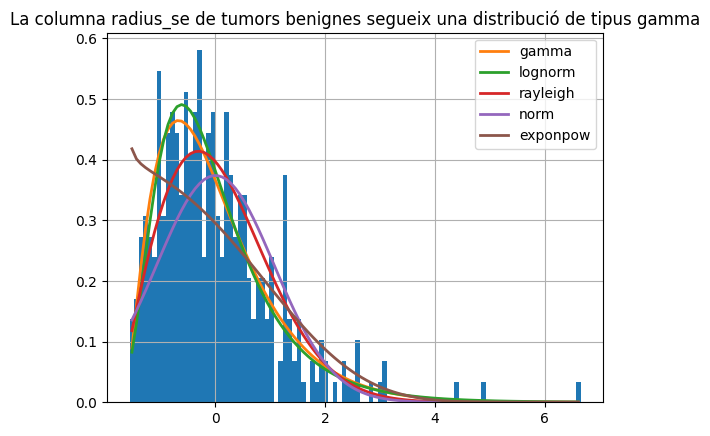

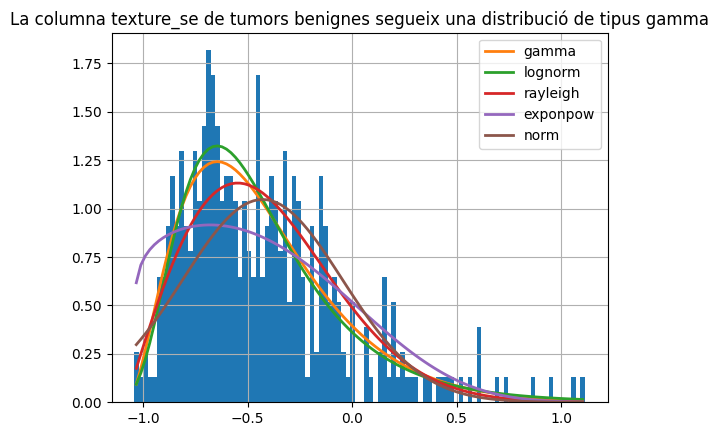

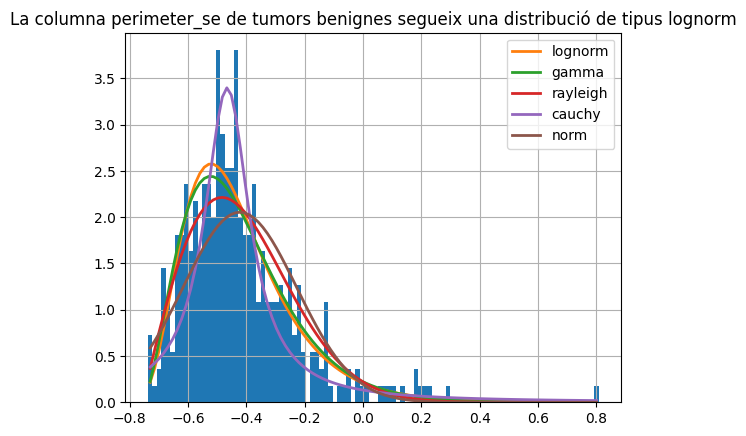

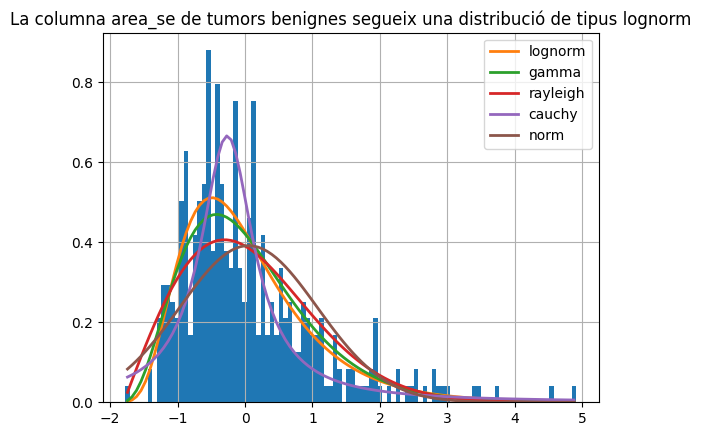

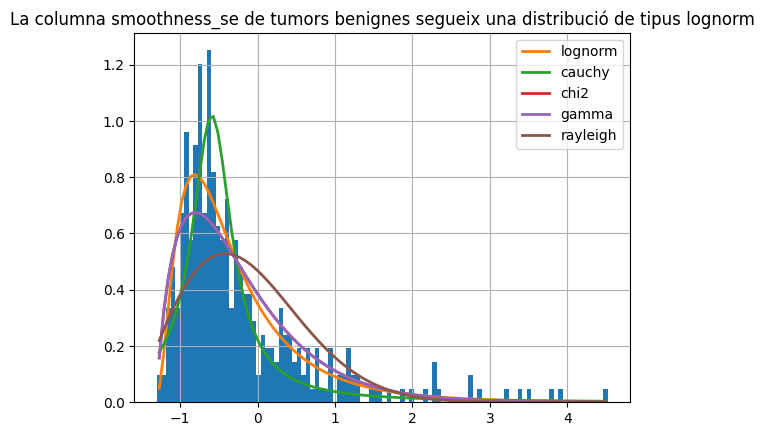

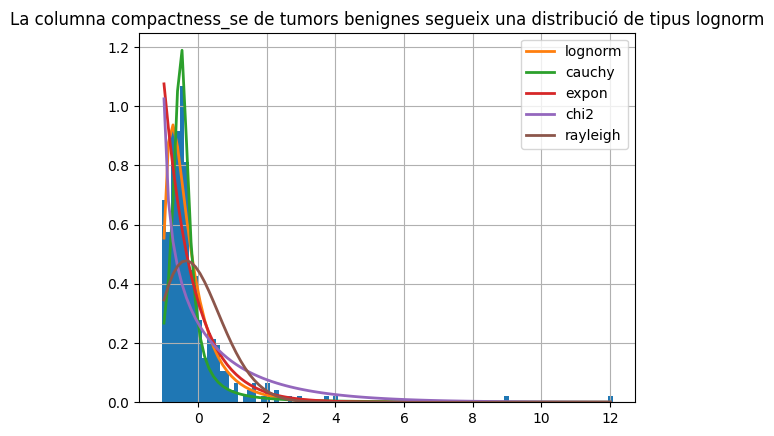

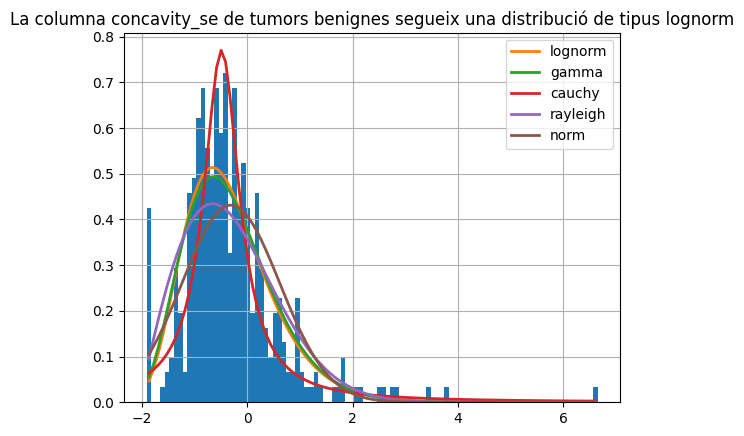

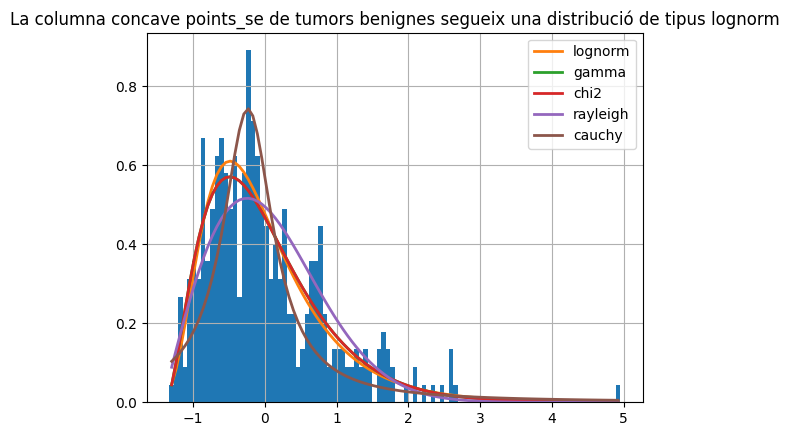

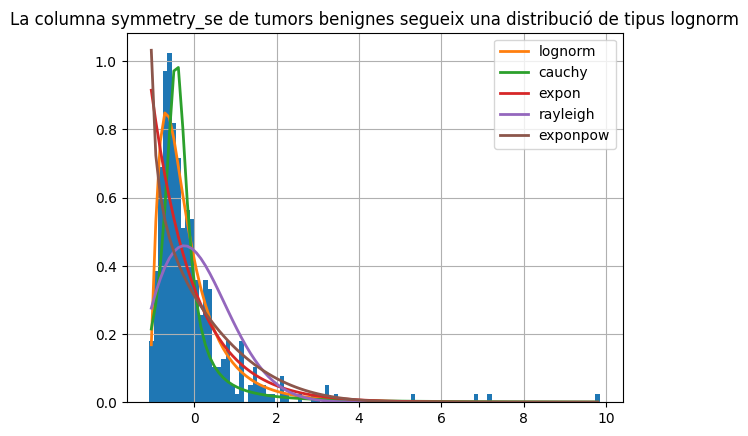

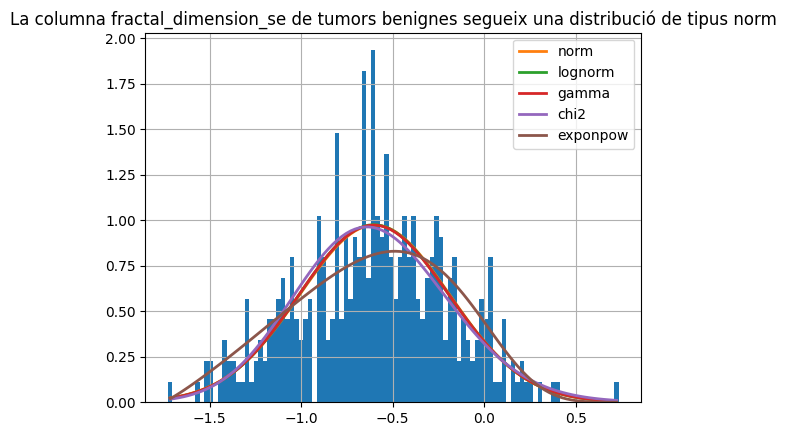

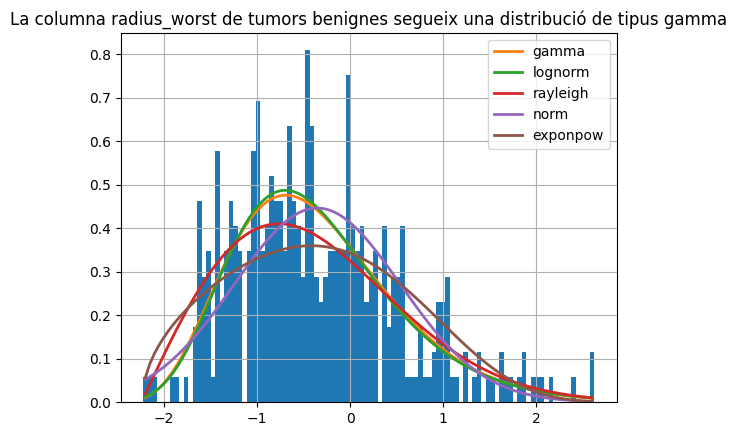

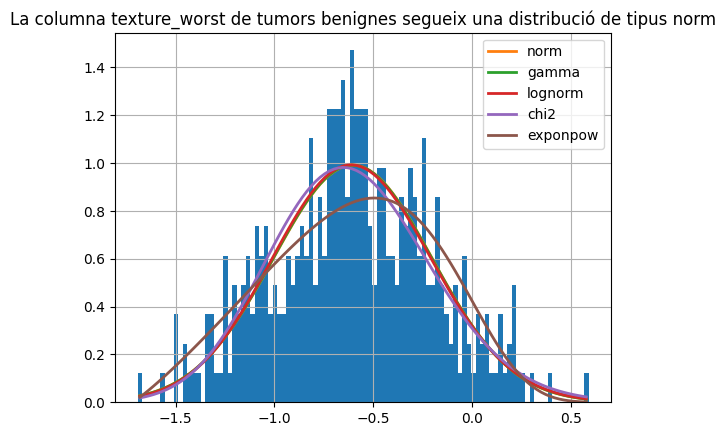

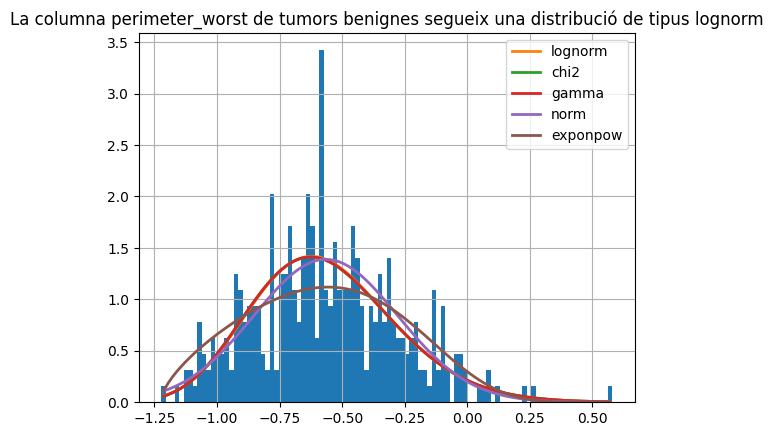

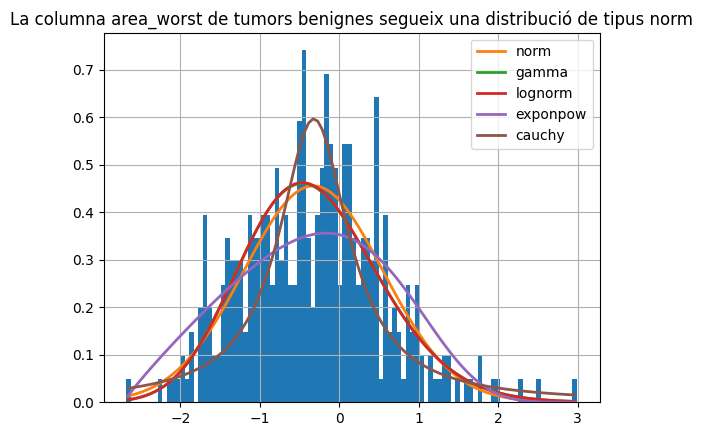

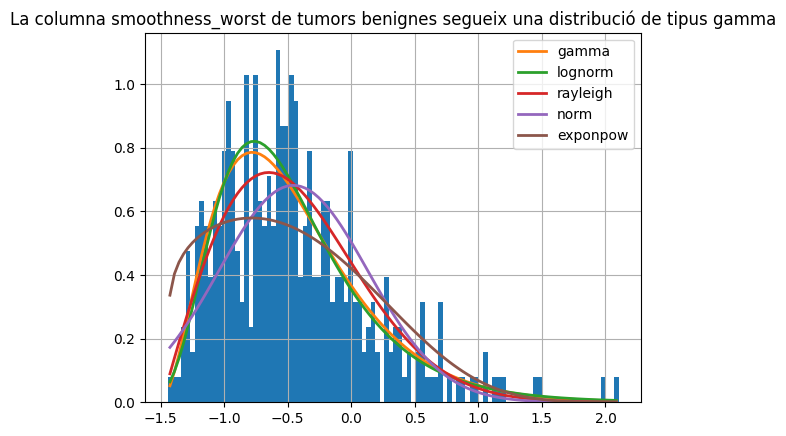

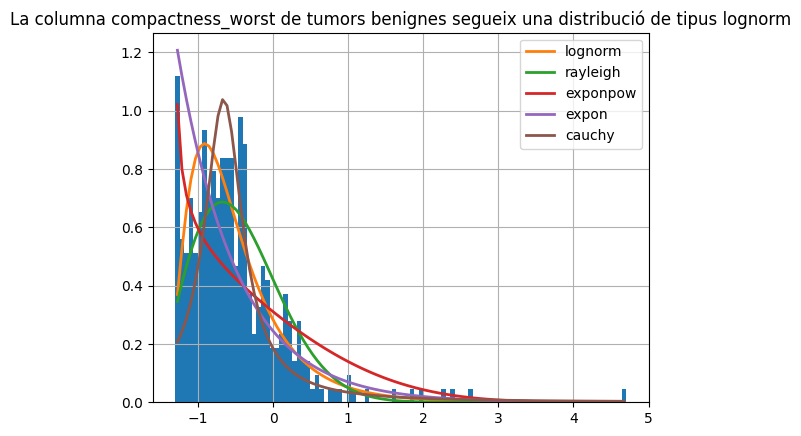

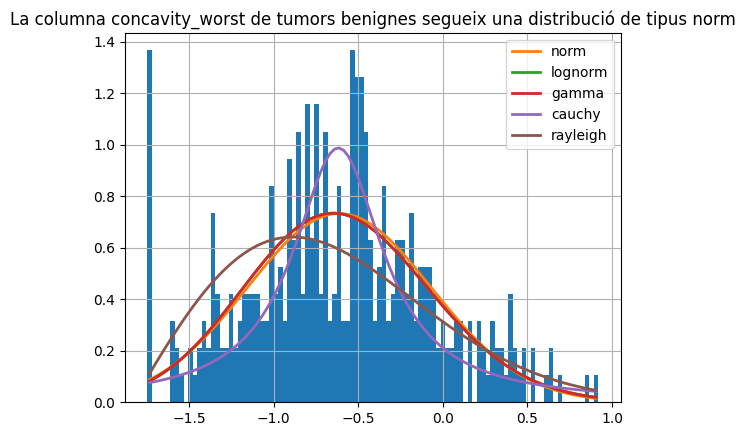

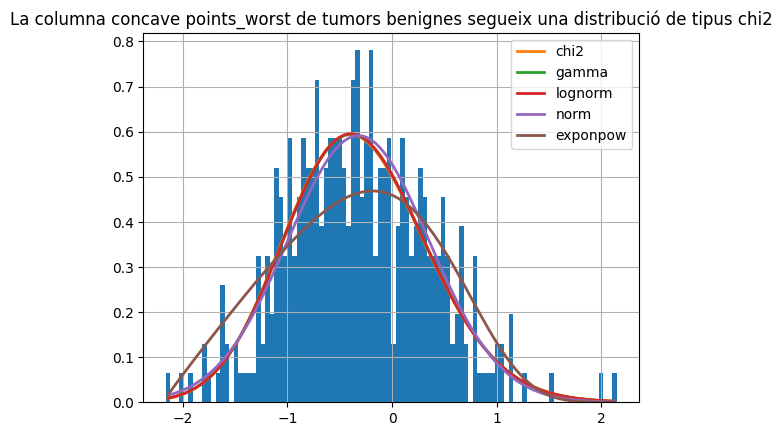

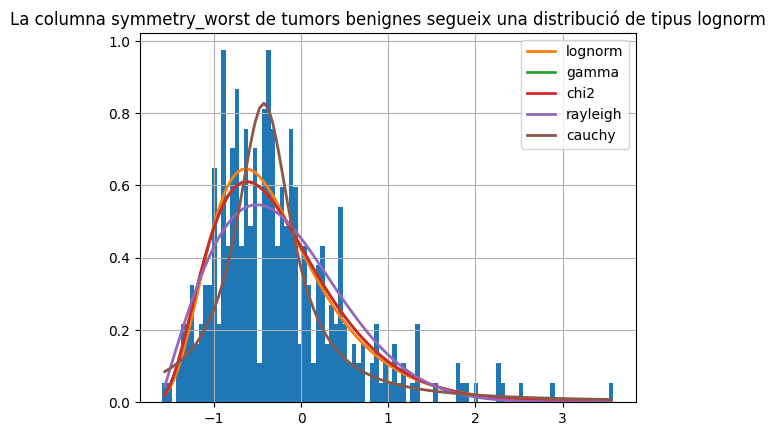

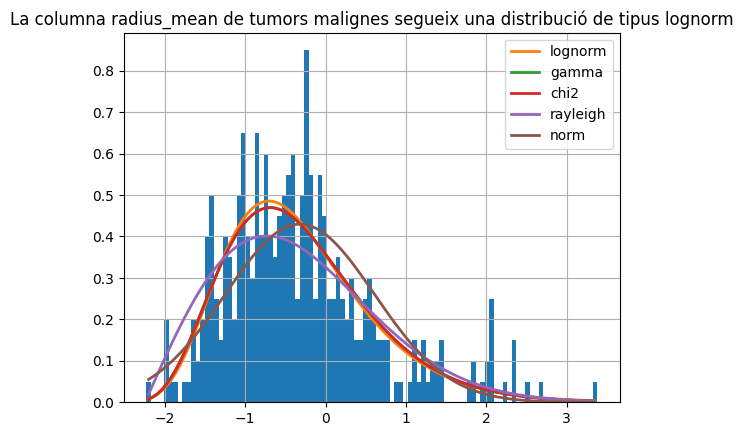

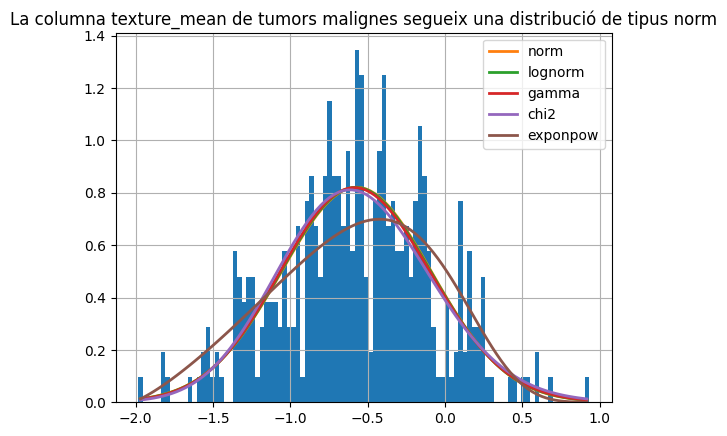

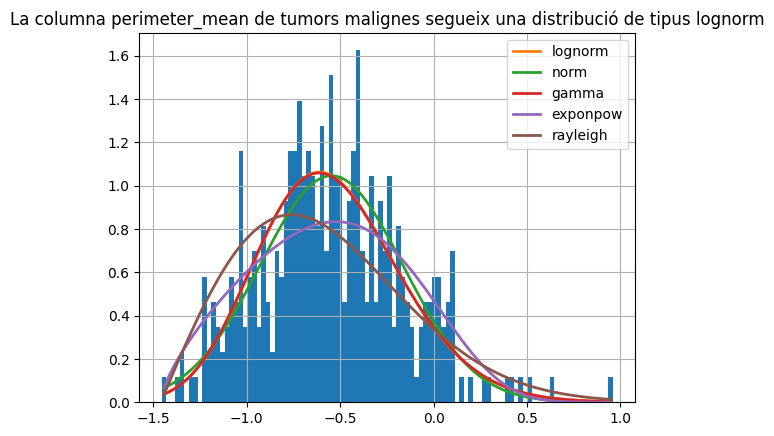

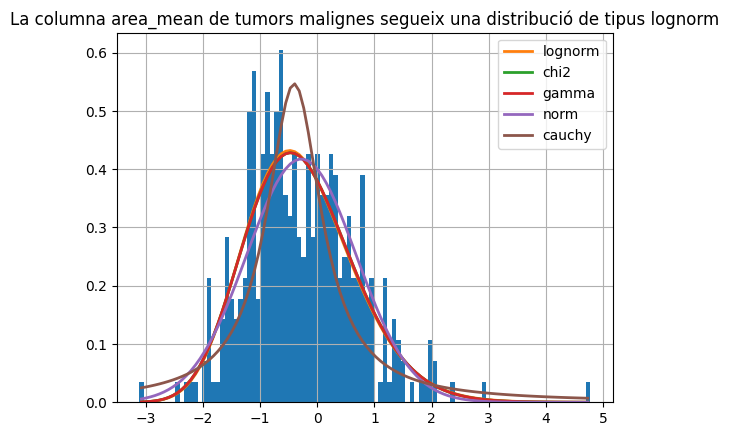

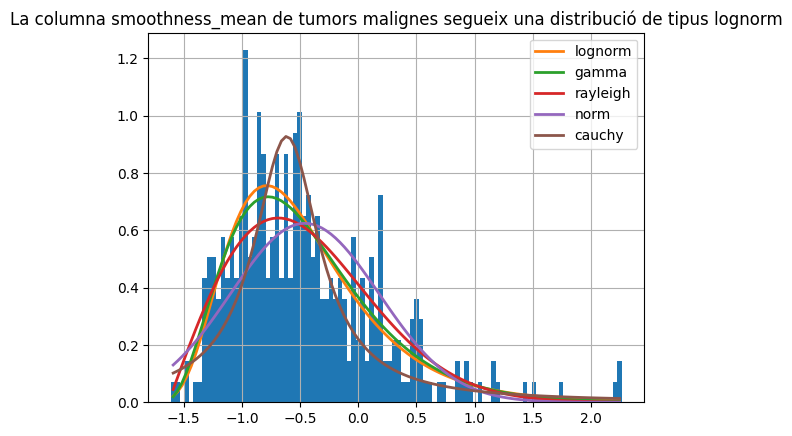

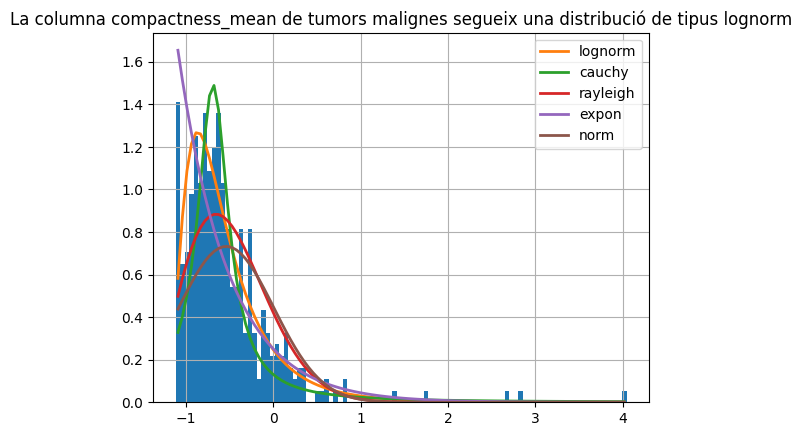

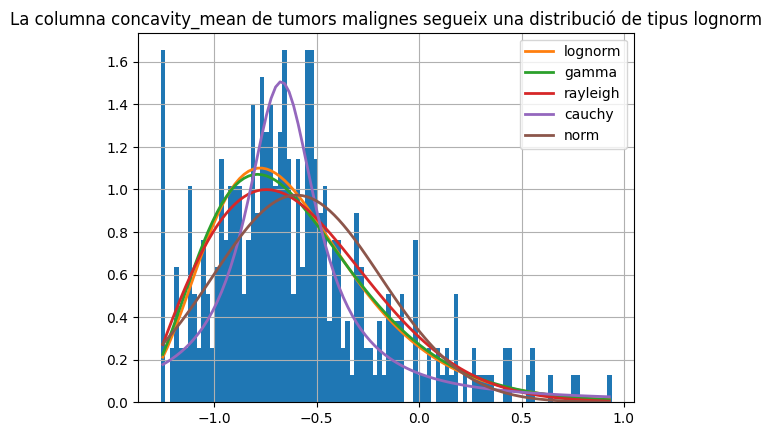

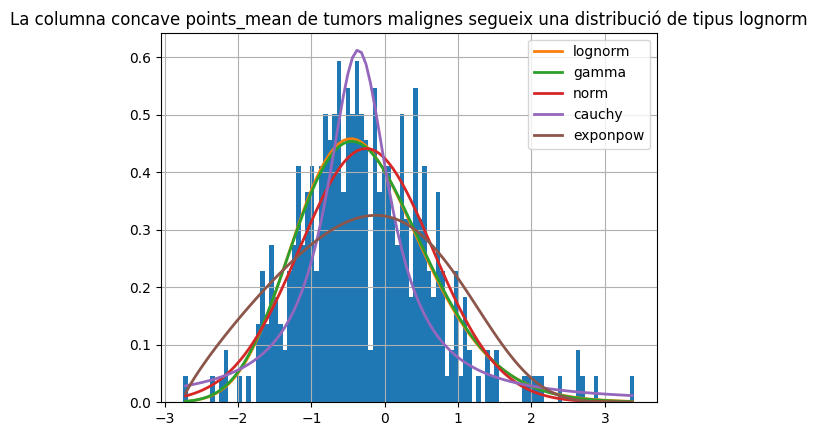

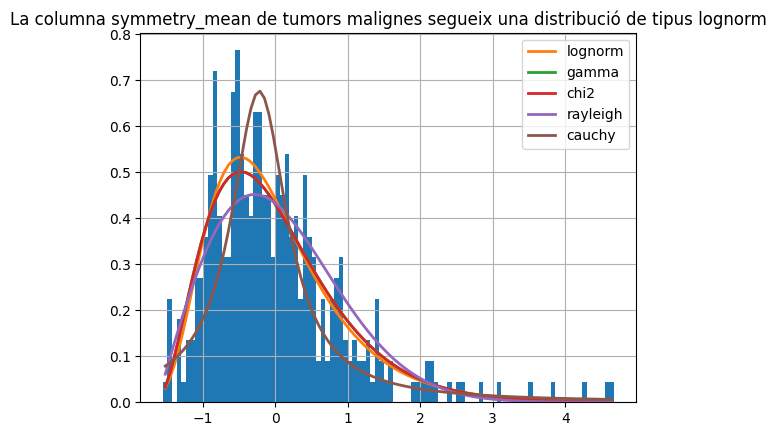

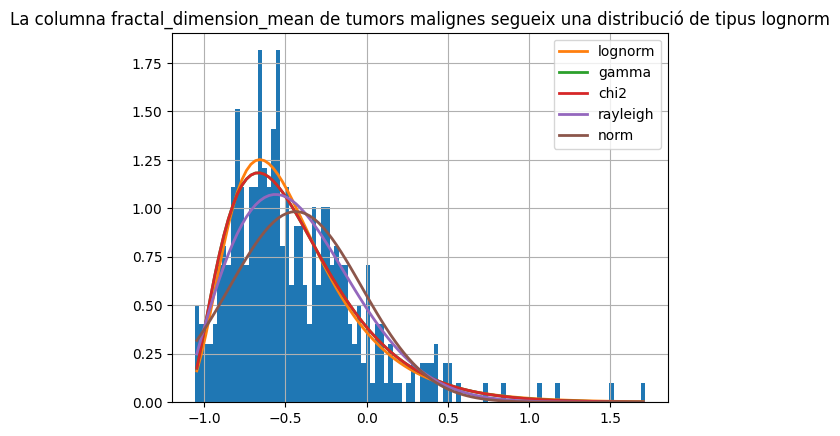

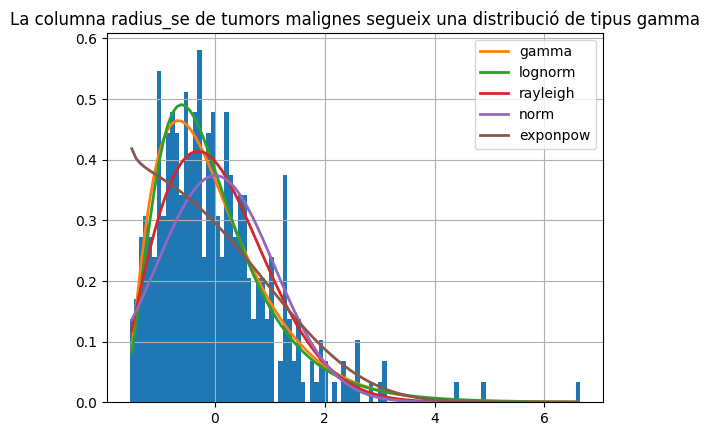

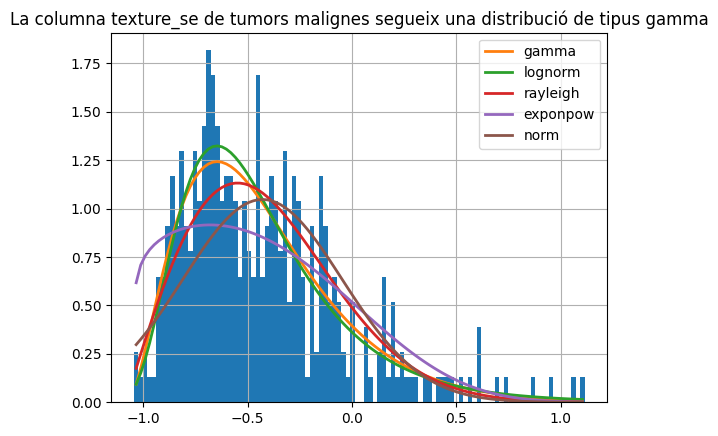

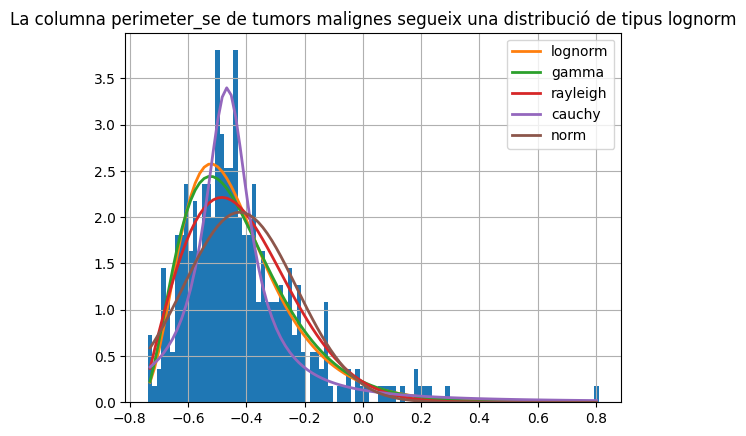

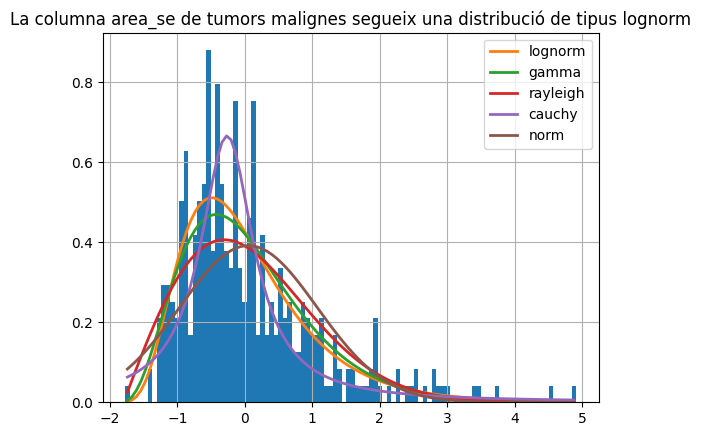

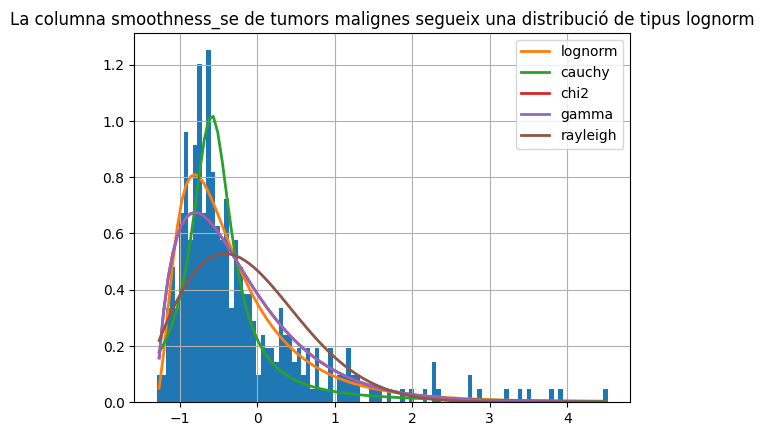

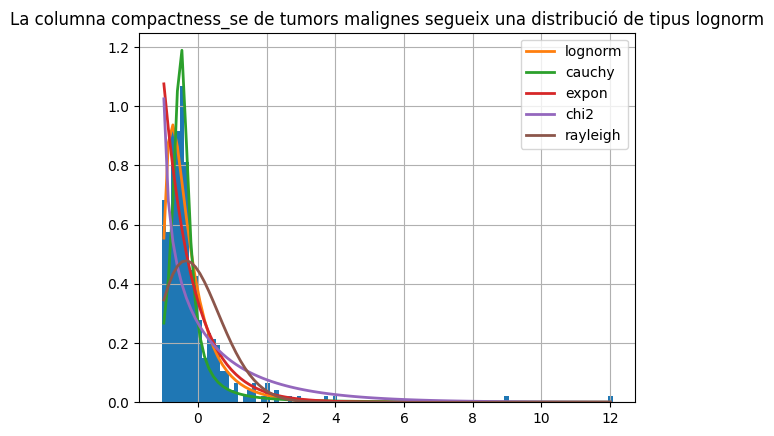

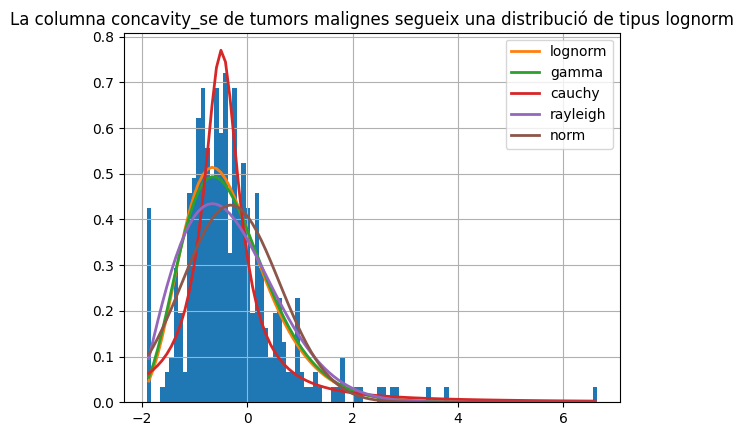

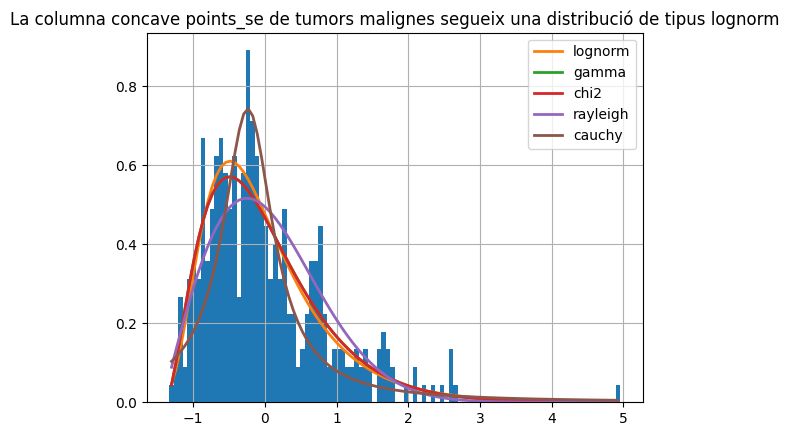

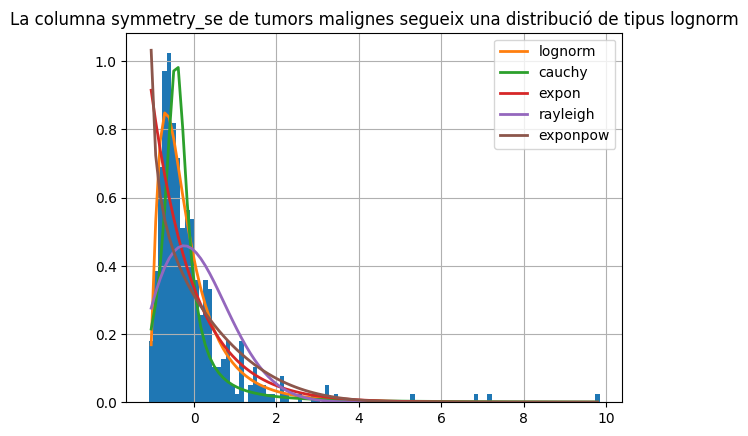

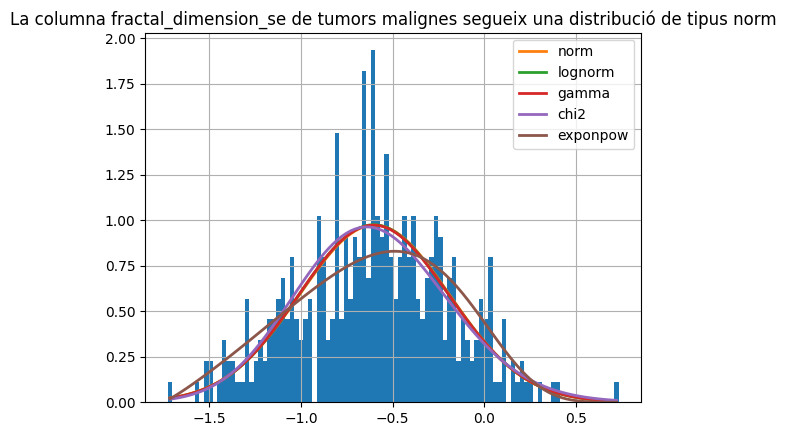

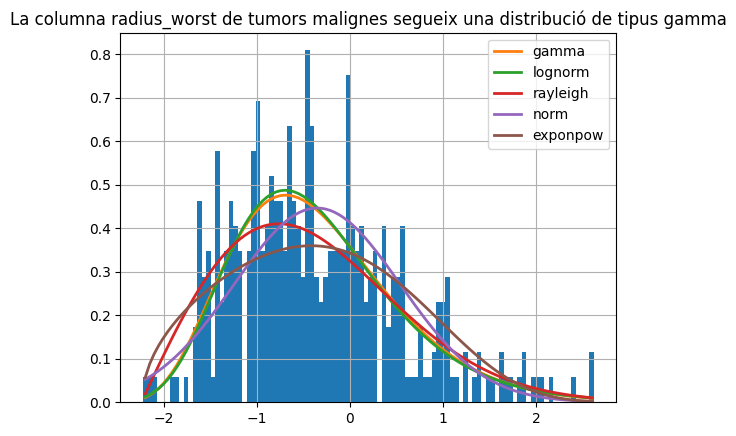

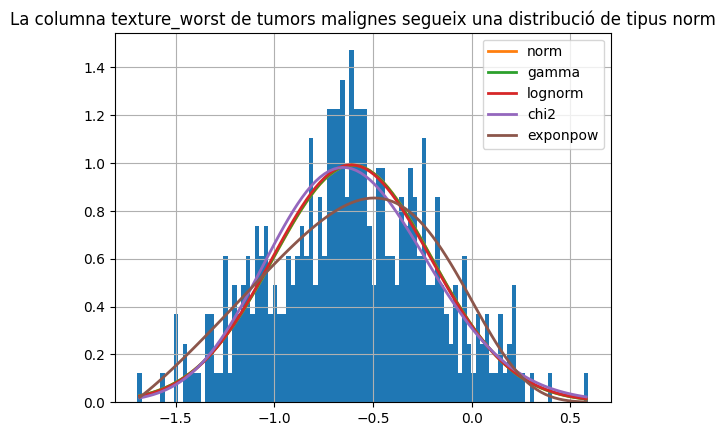

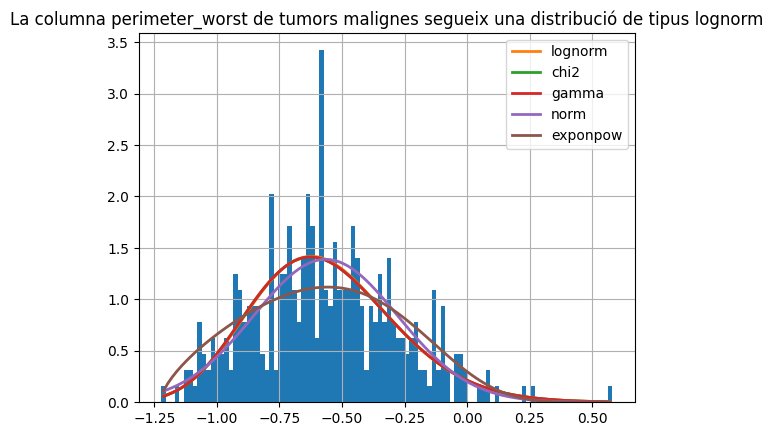

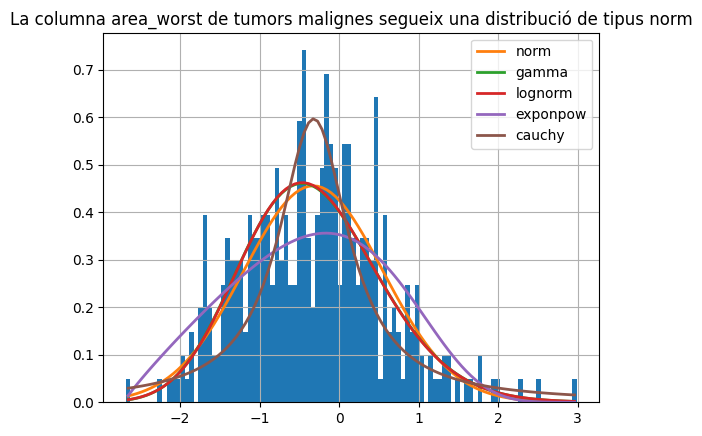

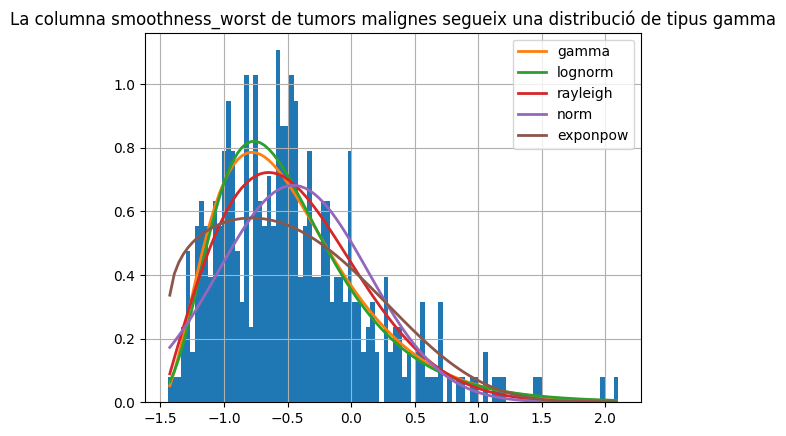

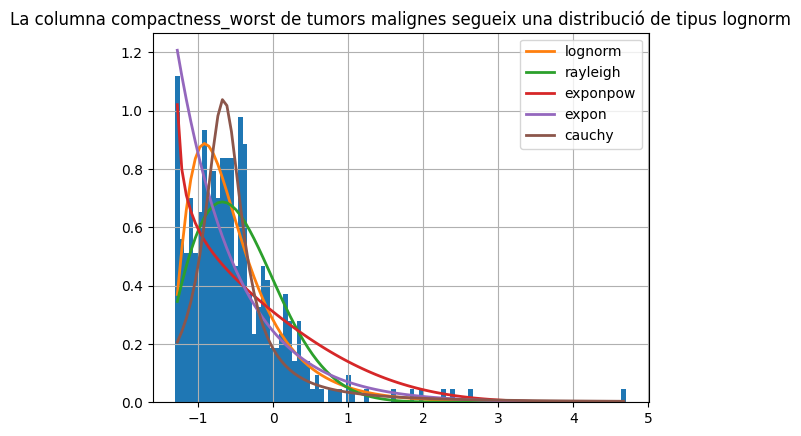

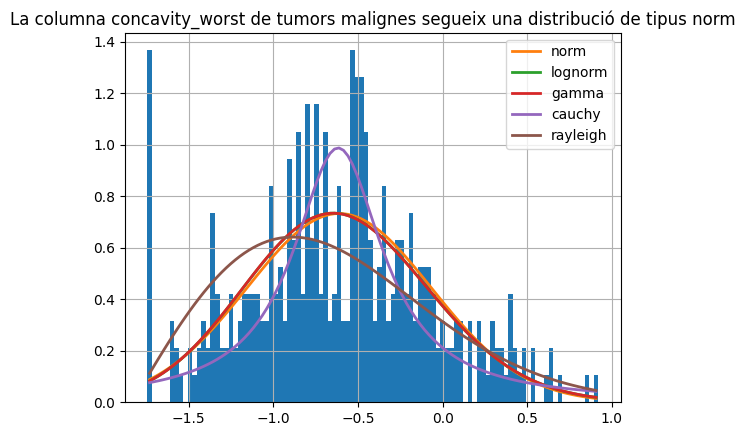

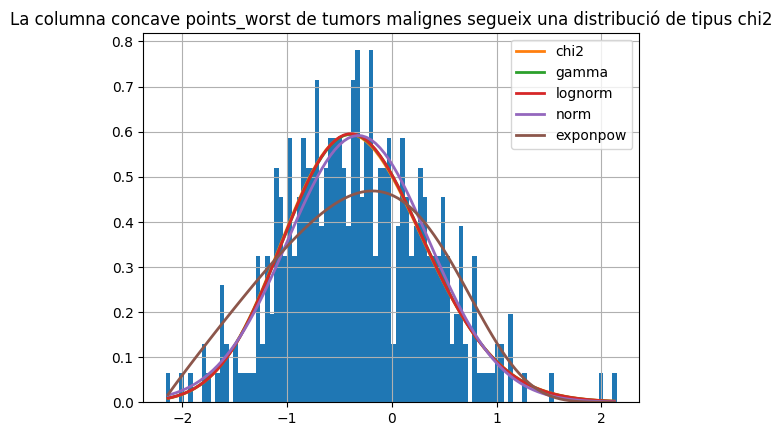

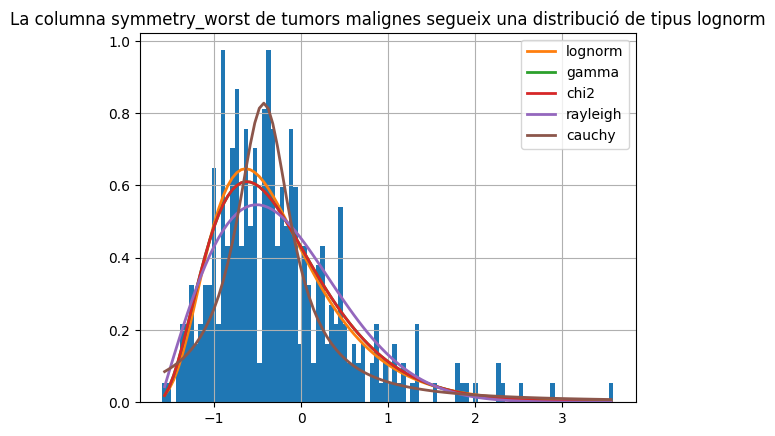

In [ ]:
for i in B.columns[:-1]:
  plt.subplot(6, 5, int(i))
  f = Fitter(B[str(int(i)+1)], distributions=get_common_distributions())
  f.fit()
  f.summary()
  plt.title(f"La columna {columns[int(i)]} de tumors benignes segueix una distribució de tipus {list(f.get_best(method='sumsquare_error').keys())[0]}")
  plt.show()

for i in M.columns[:-1]:
  plt.subplot(6, 5, int(i))
  f = Fitter(B[str(int(i)+1)], distributions=get_common_distributions())
  f.fit()
  f.summary()
  plt.title(f"La columna {columns[int(i)]} de tumors malignes segueix una distribució de tipus {list(f.get_best(method='sumsquare_error').keys())[0]}")
  plt.show()

# Carregar dades pels models

In [ ]:
df = pd.read_csv("dataset_preprocessat.csv")
df.head()


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [ ]:
df_n = pd.read_csv("dataset_preprocessat_norm.csv")
df_n.head()

# Utilitza la resta com a dades X
X = df.iloc[:, 1:].to_numpy()
X2 = df_n.iloc[:, 1:].to_numpy()

# Utilitza la columna 'diagnosis' com a dades y
y = df['diagnosis'].to_numpy()

## Divisió de dades


In [ ]:
#divisió de dades
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, stratify = y,random_state=1)
(X_train2, X_test2,  y_train2, y_test2) = cv.train_test_split(X2, y, test_size=.3, stratify = y,random_state=1)

#Naive Bayes

In [ ]:
import numpy as np                     # Llibreria matemÃ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
import pandas as pd

%matplotlib inline


Carregar i previsualitzar les dades previament preprocessades i també preprocessades i normalitzades std = 1 i mitjana = 0

## Stratified k-fols Cross validation (k=10)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, train_test_split
import sklearn.neighbors as nb

skf = StratifiedKFold(n_splits=10)

gnb = GaussianNB()

#Primer mirem les k fold scores pel no normalitzat
cv_scores = cross_val_score(gnb,X=X,y=y,cv=skf)
print("Default data score in array:", cv_scores)
print("Default data score mean:", np.mean(cv_scores))

#Després mirem les k fold scores pel normalitzat
cv_scores2 = cross_val_score(gnb,X=X2,y=y,cv=skf)
print("Normalized data score in array:", cv_scores)
print("Normalized data score mean :", np.mean(cv_scores2))


Default data score in array: [0.94736842 0.87719298 0.89473684 0.92982456 0.94736842 0.96491228
 0.92982456 0.96491228 0.94736842 0.96428571]
Default data score mean: 0.9367794486215537
Normalized data score in array: [0.94736842 0.87719298 0.89473684 0.92982456 0.94736842 0.96491228
 0.92982456 0.96491228 0.94736842 0.96428571]
Normalized data score mean : 0.9315162907268169


## Confusion matrix

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

predicted = cross_val_predict(GaussianNB(), X=X, y=y,  cv=skf)

#Primer mirem les la confusion matrix pel no normalitzat
print(confusion_matrix(y, predicted))
print(accuracy_score(y, predicted))

predicted2 = cross_val_predict(GaussianNB(), X=X2, y=y,  cv=skf)

#Primer mirem les la confusion matrix pel no normalitzat
print(confusion_matrix(y, predicted2))
print(accuracy_score(y, predicted2))

[[345  12]
 [ 24 188]]
0.9367311072056239
[[339  18]
 [ 21 191]]
0.9314586994727593


## Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y, predicted))
print(classification_report(y, predicted2))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       357
           1       0.94      0.89      0.91       212

    accuracy                           0.94       569
   macro avg       0.94      0.93      0.93       569
weighted avg       0.94      0.94      0.94       569

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       357
           1       0.91      0.90      0.91       212

    accuracy                           0.93       569
   macro avg       0.93      0.93      0.93       569
weighted avg       0.93      0.93      0.93       569



## Càlcul del llindar òptim

### Llindar òptim orientat a recall

In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold

def filterp(th, ProbClass1):
    """ Donat un llindar "th" i un conjunt de probabilitats d'afiliar-se a la classe 1 "ProbClass1", retorna les prediccions """
    y = np.zeros(ProbClass1.shape[0])
    for i, v in enumerate(ProbClass1):
        if ProbClass1[i] > th:
            y[i] = 1
    return y

clf = GaussianNB()
lth = []

# Fem una validació creuada de 10 folds amb 20 iteracions
kf = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X_train, y_train):
    X_train2, X_test2 = X_train[train_index], X_train[test_index]
    y_train2, y_test2 = y_train[train_index], y_train[test_index]

    # Entrenem amb les dades d'entrenament de la iteració
    clf.fit(X_train2, y_train2)
    # Obtenim prediccions de probabilitat per a les dades de prova de la iteració
    probs = clf.predict_proba(X_test2)
    # Recollim les probabilitats d'afiliar-se a la classe 1
    ProbClass1 = probs[:, 1]
    # Ordenem les probabilitats i generem parelles (llindar, recall-per-a-aquell-llindar)
    res = np.array([[th, recall_score(y_test2, filterp(th, ProbClass1), pos_label=1)] for th in np.sort(ProbClass1)])

    # Trobem el llindar que té el valor màxim de recall
    max_recall = np.max(res[:, 1])
    pl = np.argmax(res[:, 1])
    optimal_th_recall = res[pl, 0]

    # Emmagatzemem el llindar òptim trobat per a la iteració actual
    lth.append(optimal_th_recall)

# Calculem el llindar mitjà per a les 10 iteracions
thdef_recall = np.mean(lth)
print("Llindar seleccionat en validació creuada de 10 folds (per recall):", thdef_recall)
print()

Llindar seleccionat en validació creuada de 10 folds (per recall): 4.933152916244747e-17



### Llindar òptim orientat a accuracy

In [ ]:
from sklearn.metrics import accuracy_score

lth = []

# Fem una validació creuada de 10 folds amb 20 iteracions
kf = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X_train, y_train):
    X_train2, X_test2 = X_train[train_index], X_train[test_index]
    y_train2, y_test2 = y_train[train_index], y_train[test_index]

    # Entrenem amb les dades d'entrenament de la iteració
    clf.fit(X_train2, y_train2)
    # Obtenim prediccions de probabilitat per a les dades de prova de la iteració
    probs = clf.predict_proba(X_test2)
    # Recollim les probabilitats d'afiliar-se a la classe 1
    ProbClass1 = probs[:, 1]
    # Ordenem les probabilitats i generem parelles (llindar, accuracy-per-a-aquell-llindar)
    res = np.array([[th, accuracy_score(y_test2, filterp(th, ProbClass1))] for th in np.sort(ProbClass1)])

    # Trobem el llindar que té el valor màxim d'accuracy
    max_accuracy = np.max(res[:, 1])
    pl = np.argmax(res[:, 1])
    optimal_th_accuracy = res[pl, 0]

    # Emmagatzemem el llindar òptim trobat per a la iteració actual
    lth.append(optimal_th_accuracy)

# Calculem el llindar mitjà per a les 10 iteracions
thdef_accuracy = np.mean(lth)
print("Llindar seleccionat en validació creuada de 10 folds (per accuracy):", thdef_accuracy)
print()


Llindar seleccionat en validació creuada de 10 folds (per accuracy): 0.13392495617427363



### Llindar òptim orientat a f1-score

In [ ]:
from sklearn.metrics import f1_score

lth = []

# Fem una validació creuada de 10 folds amb 20 iteracions
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X_train, y_train):
    X_train2, X_test2 = X_train[train_index], X_train[test_index]
    y_train2, y_test2 = y_train[train_index], y_train[test_index]

    # Entrenem amb les dades d'entrenament de la iteració
    clf.fit(X_train2, y_train2)
    # Obtenim prediccions de probabilitat per a les dades de prova de la iteració
    probs = clf.predict_proba(X_test2)
    # Recollim les probabilitats d'afiliar-se a la classe 1
    ProbClass1 = probs[:, 1]
    # Ordenem les probabilitats i generem parelles (llindar, f1_score-per-a-aquell-llindar)
    res = np.array([[th, f1_score(y_test2, filterp(th, ProbClass1), pos_label=1)] for th in np.sort(ProbClass1)])

    # Trobem el llindar que té el valor màxim de F1 score
    max_f1_score = np.max(res[:, 1])
    pl = np.argmax(res[:, 1])
    optimal_th_f1_score = res[pl, 0]

    # Emmagatzemem el llindar òptim trobat per a la iteració actual
    lth.append(optimal_th_f1_score)

# Calculem el llindar mitjà per a les 10 iteracions
thdef_f1_score = np.mean(lth)
print("Llindar seleccionat en validació creuada de 10 folds (per F1 score):", thdef_f1_score)
print()


Llindar seleccionat en validació creuada de 10 folds (per F1 score): 0.24655281104960677



## Resultats de cada llindar

In [ ]:
# Train a classifier with the whole training data
clf = GaussianNB()
clf.fit(X_train, y_train)
# Obtain probabilities for data on test set
probs = clf.predict_proba(X_test)
# Generate predictions using probabilities and threshold found on 10 folds cross-validation

### Resultat del llindar orientat a recall

In [ ]:
pred = filterp(thdef_recall,probs[:,1])
# Print results with this prediction vector
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.14      0.25       107
           1       0.41      1.00      0.58        64

    accuracy                           0.46       171
   macro avg       0.71      0.57      0.41       171
weighted avg       0.78      0.46      0.37       171



Com podem veure en aquests resultats, son molt pessimistes. Aconseguim el màxim recall, que es el que busquem, però alhora classifica molta gent que és benigne com a maligne, cosa que tampoc ens interessa. Per exemple, és com si arribes al metge i tens mal de panxa i et diu que tens cancer, d'aquesta manera trobaràs tots els positius, però tindràs moolts falsos positius, com podem veure en en el precission. Només un 40% d'aquesta gent que li han dit que era positiu realment ho és. Per arreglar això anem a buscar el tresshold per la precission, a veure si obtenim algun resultat més realista i més útil, ja que aquest no ens serveix.

### Resultat del llindar orientat a accuracy

In [ ]:
pred = filterp(thdef_accuracy,probs[:,1])
# Print results with this prediction vector
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       107
           1       0.98      0.86      0.92        64

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



Aquí obtenim un resultat molt millor, ja que obtenim menys precissió a l'hora de detectar TOTS els positius, no els capturem tots, però reduim molt el nombre de falsos positius. Anem a provar fixant-nos amb el F1 score

### Resultat del llindar orientat a f1-score

In [ ]:
pred = filterp(thdef_f1_score,probs[:,1])
# Print results with this prediction vector
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       107
           1       1.00      0.86      0.92        64

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



## Histograma de probabilitats

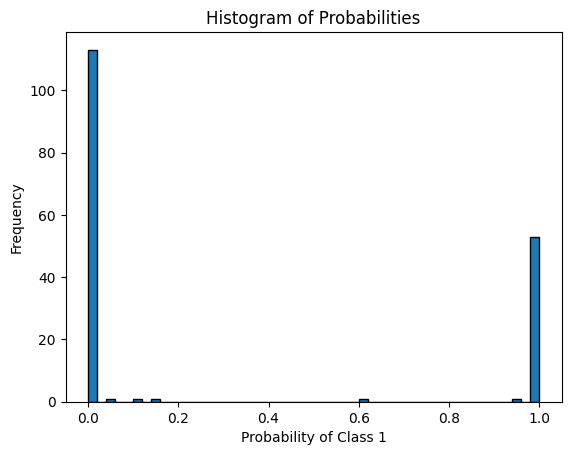

In [ ]:
import matplotlib.pyplot as plt

# Plotting histogram of probabilities
plt.hist(probs[:, 1], bins=50, edgecolor='black')
plt.xlabel('Probability of Class 1')
plt.ylabel('Frequency')
plt.title('Histogram of Probabilities')
plt.show()

In [ ]:
pred = filterp(0.001,probs[:,1])
# Print results with this prediction vector
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       107
           1       0.94      0.91      0.92        64

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



#KNN

### Impacte de la normalització en KNN

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import sklearn.neighbors as nb


cv = StratifiedKFold(n_splits=10, shuffle= True, random_state=1)
cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X, y=y, cv=cv, scoring='accuracy')
print("Puntuació per dades no normalitzades:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X2,y=df['diagnosis'], cv=cv, scoring='accuracy')
print("Puntuació per dades normalitzades:", np.mean(cv_scores))

Puntuació per dades no normalitzades: 0.9367794486215539
Puntuació per dades normalitzades: 0.9701441102756891


## SelectKBest

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

### Accuracy

Nombre de columnes seleccionades: 1 puntuació 0.8945802005012531 Última columna afegida: perimeter_worst
Nombre de columnes seleccionades: 2 puntuació 0.9033521303258146 Última columna afegida: area_worst
Nombre de columnes seleccionades: 3 puntuació 0.9033834586466165 Última columna afegida: radius_worst
Nombre de columnes seleccionades: 4 puntuació 0.9332393483709274 Última columna afegida: concave points_mean
Nombre de columnes seleccionades: 5 puntuació 0.9473370927318296 Última columna afegida: concave points_worst
Nombre de columnes seleccionades: 6 puntuació 0.9490601503759397 Última columna afegida: perimeter_mean
Nombre de columnes seleccionades: 7 puntuació 0.9525689223057643 Última columna afegida: concavity_mean
Nombre de columnes seleccionades: 8 puntuació 0.9473057644110275 Última columna afegida: radius_mean
Nombre de columnes seleccionades: 9 puntuació 0.9543233082706767 Última columna afegida: area_mean
Nombre de columnes seleccionades: 10 puntuació 0.9455200501253133 

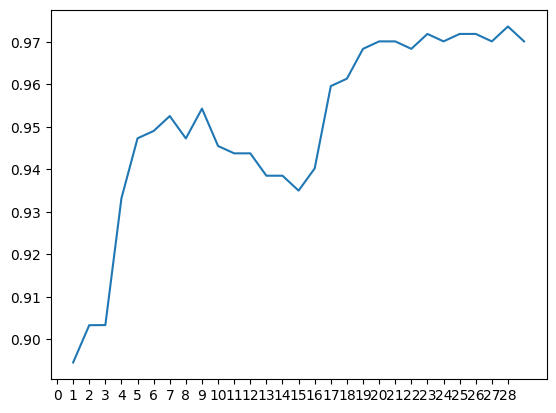

In [ ]:
original = np.zeros(29)
last_indices = []
for i in range(29):
    selector = SelectKBest(mutual_info_classif, k=i+1)
    X_new = selector.fit_transform(X2, y)
    selected_indices = selector.get_support(indices=True)
    selected_indices = [x+1 for x in selected_indices]
    X_new = SelectKBest(mutual_info_classif, k=i+1).fit_transform(X2, y)
    cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X_new,y=y, cv=cv, scoring='accuracy')
    original[i]=np.mean(cv_scores)
    print("Nombre de columnes seleccionades:", i+1, "puntuació", np.mean(cv_scores), "Última columna afegida:", df.columns[[item for item in selected_indices if item not in last_indices]][0])
    last_indices = selected_indices

plt.xticks(np.arange(0, 29, step=1))
plt.plot(range(1,30),original)
plt.show()

Ens donem compte de que podem reduir 10 columnes obtenint molt bon resultat, llavors ens quedem amb les 19 Kbest. Amés està contrastat per l'accuracy i el F1 score

### Recall

Nombre de columnes seleccionades: 1 puntuació 0.8296536796536798 Última columna afegida: perimeter_worst
Nombre de columnes seleccionades: 2 puntuació 0.8536796536796537 Última columna afegida: area_worst
Nombre de columnes seleccionades: 3 puntuació 0.848917748917749 Última columna afegida: radius_worst
Nombre de columnes seleccionades: 4 puntuació 0.9153679653679655 Última columna afegida: concave points_mean
Nombre de columnes seleccionades: 5 puntuació 0.9296536796536797 Última columna afegida: concave points_worst
Nombre de columnes seleccionades: 6 puntuació 0.9251082251082252 Última columna afegida: perimeter_mean
Nombre de columnes seleccionades: 7 puntuació 0.9251082251082252 Última columna afegida: concavity_mean
Nombre de columnes seleccionades: 8 puntuació 0.9158008658008658 Última columna afegida: radius_mean
Nombre de columnes seleccionades: 9 puntuació 0.9300865800865801 Última columna afegida: area_mean
Nombre de columnes seleccionades: 10 puntuació 0.9062770562770563 Ú

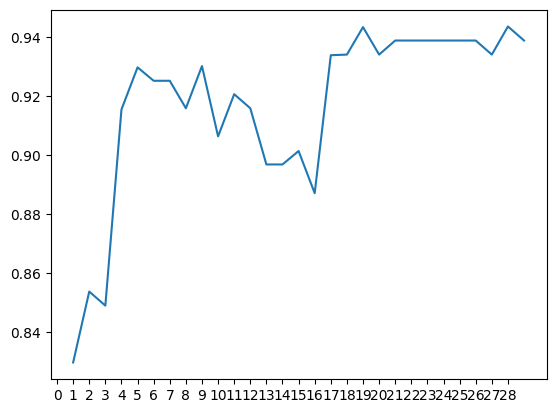

In [ ]:
original = np.zeros(29)
last_indices = []
for i in range(29):
    selector = SelectKBest(mutual_info_classif, k=i+1)
    X_new = selector.fit_transform(X2, y)
    selected_indices = selector.get_support(indices=True)
    selected_indices = [x+1 for x in selected_indices]
    X_new = SelectKBest(mutual_info_classif, k=i+1).fit_transform(X2, y)
    cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X_new,y=y, cv=cv, scoring='recall')
    original[i]=np.mean(cv_scores)
    print("Nombre de columnes seleccionades:", i+1, "puntuació", np.mean(cv_scores), "Última columna afegida:", df.columns[[item for item in selected_indices if item not in last_indices]][0])
    last_indices = selected_indices

plt.xticks(np.arange(0, 29, step=1))
plt.plot(range(1,30),original)
plt.show()

Ens donem compte de que podem reduir 10 columnes obtenint molt bon resultat, llavors ens quedem amb les 19 Kbest. Amés està contrastat per l'accuracy i el F1 score

### F1-Score

Nombre de columnes seleccionades: 1 puntuació 0.8535807746791727 Última columna afegida: perimeter_worst
Nombre de columnes seleccionades: 2 puntuació 0.8676507890675935 Última columna afegida: area_worst
Nombre de columnes seleccionades: 3 puntuació 0.8672811584609785 Última columna afegida: radius_worst
Nombre de columnes seleccionades: 4 puntuació 0.9105141542168349 Última columna afegida: concave points_mean
Nombre de columnes seleccionades: 5 puntuació 0.9301540467829404 Última columna afegida: concave points_worst
Nombre de columnes seleccionades: 6 puntuació 0.9313910885862106 Última columna afegida: perimeter_mean
Nombre de columnes seleccionades: 7 puntuació 0.9357815689069234 Última columna afegida: concavity_mean
Nombre de columnes seleccionades: 8 puntuació 0.928353516402297 Última columna afegida: radius_mean
Nombre de columnes seleccionades: 9 puntuació 0.9386067997043608 Última columna afegida: area_mean
Nombre de columnes seleccionades: 10 puntuació 0.9257011479728441 Ú

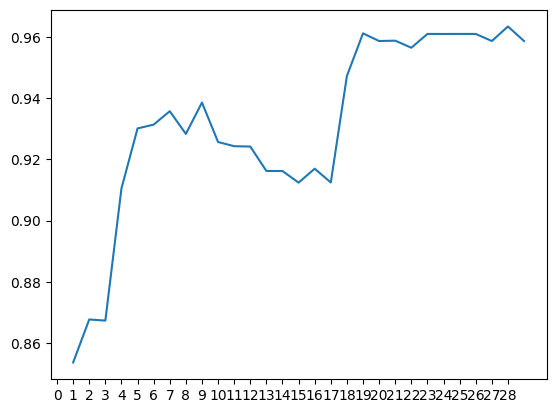

In [ ]:
original = np.zeros(29)
last_indices = []
for i in range(29):
    selector = SelectKBest(mutual_info_classif, k=i+1)
    X_new = selector.fit_transform(X2, y)
    selected_indices = selector.get_support(indices=True)
    selected_indices = [x+1 for x in selected_indices]
    cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X_new,y=y, cv=cv, scoring='f1')
    original[i]=np.mean(cv_scores)
    print("Nombre de columnes seleccionades:", i+1, "puntuació", np.mean(cv_scores), "Última columna afegida:", df.columns[[item for item in selected_indices if item not in last_indices]][0])
    last_indices = selected_indices

plt.xticks(np.arange(0, 29, step=1))
plt.plot(range(1,30),original)
plt.show()

## Cerca dels millors paràmetres



### Accuracy

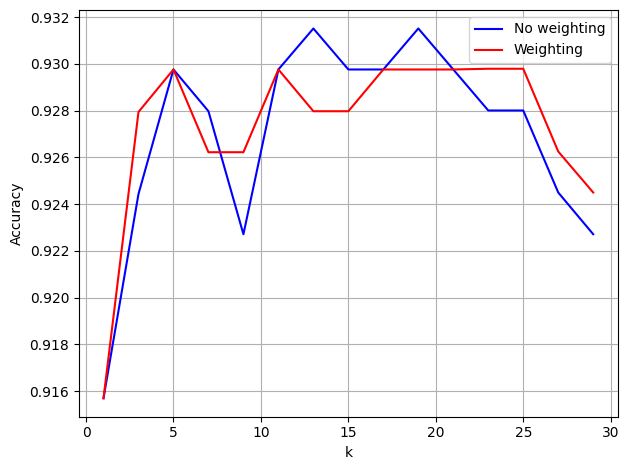

In [ ]:
X_new = SelectKBest(mutual_info_classif, k=19).fit_transform(X, y)

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_new, y=y, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'b',label='No weighting')

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_new, y=y, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1, scoring="accuracy")  # If cv is integer, by default is Stratifyed
clf.fit(X_new, y)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)


Best Params= {'n_neighbors': 13, 'weights': 'uniform'} Accuracy= 0.9315162907268169


### Recall

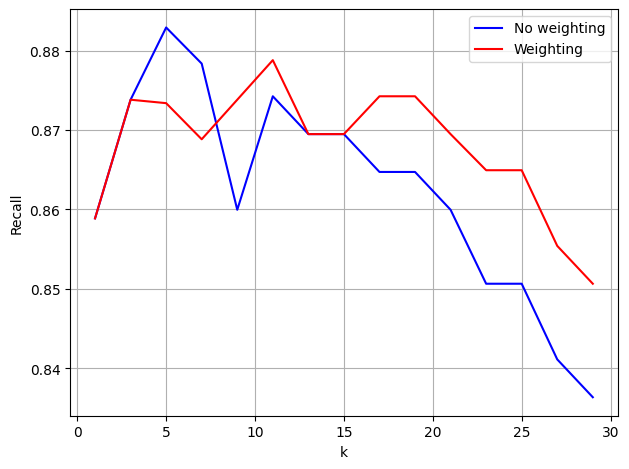

In [ ]:


lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_new, y=y, cv=10, scoring="recall")
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'b',label='No weighting')

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_new, y=y, cv=10, scoring="recall")
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Recall')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1, scoring="recall")  # If cv is integer, by default is Stratifyed
clf.fit(X_new, y)
print("Best Params=",clf.best_params_, "Recall=", clf.best_score_)


Best Params= {'n_neighbors': 5, 'weights': 'uniform'} Recall= 0.8829004329004329


### F1-Score

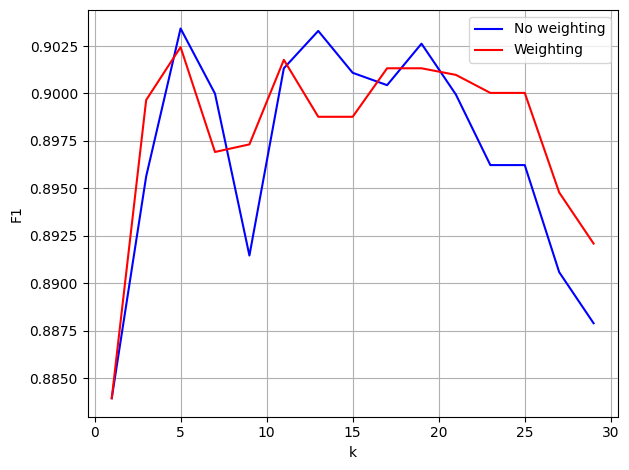

In [ ]:


lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_new, y=y, cv=10, scoring="f1")
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'b',label='No weighting')

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_new, y=y, cv=10, scoring="f1")
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('F1')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1, scoring="f1")  # If cv is integer, by default is Stratifyed
clf.fit(X_new, y)
print("Best Params=",clf.best_params_, "f1_score=", clf.best_score_)

Best Params= {'n_neighbors': 5, 'weights': 'uniform'} f1_score= 0.9034237622212664


## Apliquem resultats

In [ ]:

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer
import sklearn.model_selection as cvs    # Pel Cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics


### 5 veïns

In [ ]:
knc = nb.KNeighborsClassifier(n_neighbors=5,weights='uniform')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)

print(metrics.classification_report(y_test, pred, digits=4))

              precision    recall  f1-score   support

           0     0.9273    0.9533    0.9401       107
           1     0.9180    0.8750    0.8960        64

    accuracy                         0.9240       171
   macro avg     0.9227    0.9141    0.9180       171
weighted avg     0.9238    0.9240    0.9236       171



### 13 veïns

In [ ]:
knc = nb.KNeighborsClassifier(n_neighbors=13,weights='uniform')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)

print(metrics.classification_report(y_test, pred, digits=4))

              precision    recall  f1-score   support

           0     0.9211    0.9813    0.9502       107
           1     0.9649    0.8594    0.9091        64

    accuracy                         0.9357       171
   macro avg     0.9430    0.9203    0.9297       171
weighted avg     0.9375    0.9357    0.9348       171



# Decision Trees

Carregar i previsualitzar les dades previament preprocessades i també preprocessades i normalitzades std = 1 i mitjana = 0

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, train_test_split
import sklearn.neighbors as nb
from sklearn import tree

skf = StratifiedKFold(n_splits=10)


cv_scores = cross_val_score(tree.DecisionTreeClassifier(),X=X,y=y,cv=skf)
print("Puntuació del cross validation amb dades no normalitzades:", np.mean(cv_scores))
cv_scores2 = cross_val_score(tree.DecisionTreeClassifier(),X=X2,y=y,cv=skf)
print("Puntuació del cross validation amb dades normalitzades:", np.mean(cv_scores2))

Puntuació del cross validation amb dades no normalitzades: 0.9068609022556391
Puntuació del cross validation amb dades normalitzades: 0.9069235588972431


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
predicted2 = cross_val_predict(tree.DecisionTreeClassifier(), X=X2, y=y, cv=skf)
predicted = cross_val_predict(tree.DecisionTreeClassifier(), X=X, y=y, cv=skf)

print("Resultat amb dades normalitzades")
print(confusion_matrix(y, predicted2))
print("f1_score: ", f1_score(y, predicted2))
print("accuracy: ",accuracy_score(y, predicted2))
print()
print()
print("Resultat amb dades no normalitzades")
print(confusion_matrix(y, predicted))
print("f1_score: ", f1_score(y, predicted))
print("accuracy: ",accuracy_score(y, predicted))

Resultat amb dades normalitzades
[[332  25]
 [ 23 189]]
f1_score:  0.8873239436619719
accuracy:  0.9156414762741653


Resultat amb dades no normalitzades
[[331  26]
 [ 22 190]]
f1_score:  0.8878504672897196
accuracy:  0.9156414762741653


In [ ]:
from sklearn.metrics import classification_report
print("Report per dades no normalitzades")
print(classification_report(y, predicted))
print()
print("Report per dades normalitzades")
print(classification_report(y, predicted2))

Report per dades no normalitzades
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       357
           1       0.88      0.90      0.89       212

    accuracy                           0.92       569
   macro avg       0.91      0.91      0.91       569
weighted avg       0.92      0.92      0.92       569


Report per dades normalitzades
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       357
           1       0.88      0.89      0.89       212

    accuracy                           0.92       569
   macro avg       0.91      0.91      0.91       569
weighted avg       0.92      0.92      0.92       569



In [ ]:
from sklearn import tree
from statsmodels.stats.proportion import proportion_confint

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, pred))
print()

print()
print(sklearn.metrics.classification_report(y_test, pred))
f1 = sklearn.metrics.f1_score(y_test, pred)
ci_f1 = proportion_confint(count=int(round(f1*X_test.shape[0])), nobs=X_test.shape[0], alpha=0.05, method='binom_test')

# Imprimeix el f1 i l'interval de confiança per al f1

print("Confidence Interval for f1_score:", ci_f1)

0.9064327485380117
[[103   4]
 [ 12  52]]


              precision    recall  f1-score   support

           0       0.90      0.96      0.93       107
           1       0.93      0.81      0.87        64

    accuracy                           0.91       171
   macro avg       0.91      0.89      0.90       171
weighted avg       0.91      0.91      0.90       171

Confidence Interval for f1_score: (0.8047515847858754, 0.9101935704070083)


In [ ]:
from sklearn import tree
from statsmodels.stats.proportion import proportion_confint

clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, pred))
print()

print()
print(sklearn.metrics.classification_report(y_test, pred))
f1 = sklearn.metrics.f1_score(y_test, pred)
ci_f1 = proportion_confint(count=int(round(f1*X_test.shape[0])), nobs=X_test.shape[0], alpha=0.05, method='binom_test')

# Imprimeix el f1 i l'interval de confiança per al f1

print("Confidence Interval for f1_score:", ci_f1)

0.9415204678362573
[[104   3]
 [  7  57]]


              precision    recall  f1-score   support

           0       0.94      0.97      0.95       107
           1       0.95      0.89      0.92        64

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

Confidence Interval for f1_score: (0.8662832909884166, 0.9513360476040355)


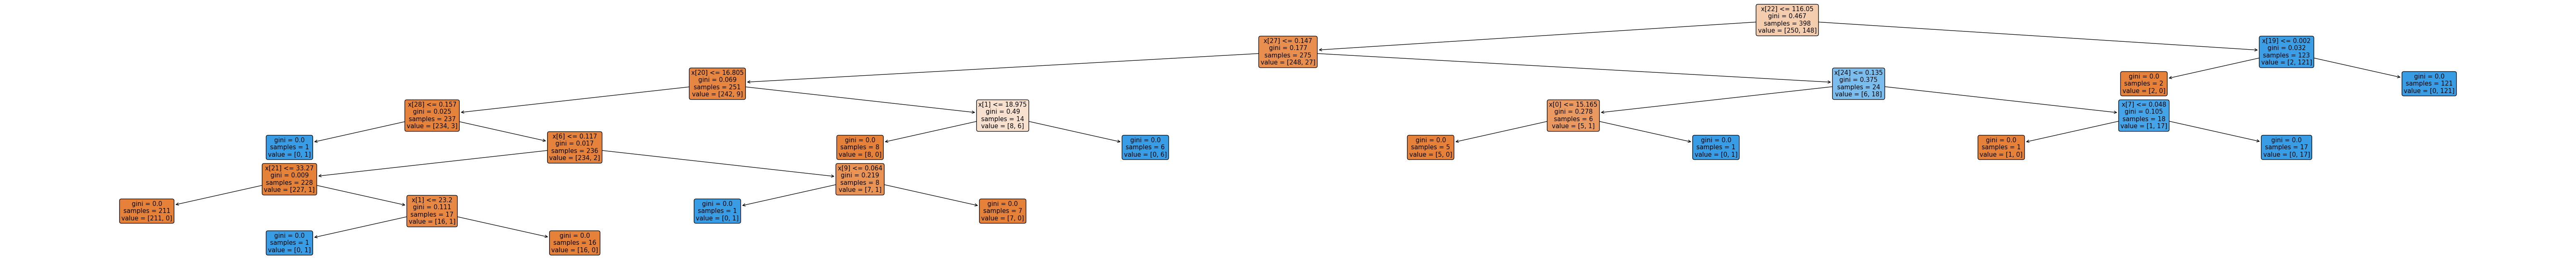

|--- feature_22 <= 116.05
|   |--- feature_27 <= 0.15
|   |   |--- feature_20 <= 16.81
|   |   |   |--- feature_28 <= 0.16
|   |   |   |   |--- class: 1
|   |   |   |--- feature_28 >  0.16
|   |   |   |   |--- feature_6 <= 0.12
|   |   |   |   |   |--- feature_21 <= 33.27
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_21 >  33.27
|   |   |   |   |   |   |--- feature_1 <= 23.20
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  23.20
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  0.12
|   |   |   |   |   |--- feature_9 <= 0.06
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_9 >  0.06
|   |   |   |   |   |   |--- class: 0
|   |   |--- feature_20 >  16.81
|   |   |   |--- feature_1 <= 18.97
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  18.97
|   |   |   |   |--- class: 1
|   |--- feature_27 >  0.15
|   |   |--- feature_24 <= 0.14
|   |   |   |--- feature_0 <= 15.16
| 

In [ ]:
from sklearn.tree import export_text

fig = plt.gcf()
fig.set_size_inches(80, 8)

tree.plot_tree(clf, filled=True,rounded=True)
fig.savefig('tree.png')
plt.show()


tree_rules = export_text(clf)
print(tree_rules)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defineix els paràmetres a ajustar
params = {'min_impurity_decrease': list(np.linspace(0, 0.5, 21)), 'min_samples_split': list(range(2, 20, 11))}

# Inicialitza el GridSearchCV amb 'f1' com a mètrica d'avaluació
clf = GridSearchCV(
    tree.DecisionTreeClassifier(criterion='entropy'),
    param_grid=params,
    cv=10,
    scoring='f1',  # Utilitza 'f1' com a mètrica d'avaluació
    n_jobs=-1
)

# Ajusta el GridSearchCV amb les dades d'entrenament
clf.fit(X_train, y_train)

# Imprimeix els millors paràmetres i l'accuracy corresponent
print("Best Params=", clf.best_params_, "f1=", clf.best_score_)


Best Params= {'min_impurity_decrease': 0.025, 'min_samples_split': 2} f1= 0.926765850945495


In [ ]:
clf=tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=clf.best_params_['min_samples_split'],min_impurity_decrease=clf.best_params_['min_impurity_decrease'])
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, pred))
print()
print("F1:", sklearn.metrics.f1_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.f1_score(y_test, pred)
epsilon_count = int(epsilon * X_test.shape[0])
print("Interval of confidence:", proportion_confint(count=epsilon_count, nobs=X_test.shape[0], alpha=0.05, method='binom_test'))

0.9122807017543859
[[104   3]
 [ 12  52]]

F1: 0.8739495798319329

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       107
           1       0.95      0.81      0.87        64

    accuracy                           0.91       171
   macro avg       0.92      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171

Interval of confidence: (0.8133875947777041, 0.9162765333252791)


# SVMs

##Kernel linial

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

#knc = LinearSVC()
knc = SVC(kernel='linear')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nF1 on test set: ",sklearn.metrics.f1_score(y_test, pred))


Confusion matrix on test set:
 [[106   1]
 [  7  57]]

F1 on test set:  0.9344262295081966


In [ ]:
knc = SVC(kernel='linear')
knc.fit(X2_train, y2_train)
pred=knc.predict(X2_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y2_test, pred))
print("\nF1 on test set: ",sklearn.metrics.f1_score(y2_test, pred))

Confusion matrix on test set:
 [[105   2]
 [  6  58]]

F1 on test set:  0.9354838709677419


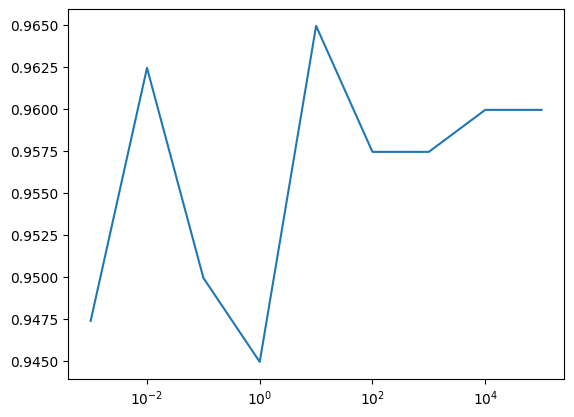

Confusion matrix on test set:
 [[106   1]
 [  7  57]]

 f1_score on test set:  0.9344262295081966

Best value of parameter C found:  {'C': 10.0}

Number of supports:  32 ( 21 of them have slacks)
Prop. of supports:  0.08040201005025126


In [ ]:
# List of C values to test. We usualy test diverse orders of magnitude
#Cs = np.logspace(-3, 11, num=15, base=10.0)
Cs = np.logspace(-3, 5, num=9, base=10.0)

param_grid = {'C': Cs}
#grid_search = GridSearchCV(LinearSVC(), param_grid, cv=10)
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=10)
grid_search.fit(X_train,y_train)

# Let's plot the 10-fold cross.validation accuracy deppending on C
scores = grid_search.cv_results_['mean_test_score']
plt.semilogx(Cs,scores)
plt.show()

# Let's apply the best C parameter found to the test set
parval=grid_search.best_params_
#knc = LinearSVC(C=parval['C'])
knc = SVC(C=parval['C'],kernel='linear')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\n f1_score on test set: ",sklearn.metrics.f1_score(y_test, pred))
print("\nBest value of parameter C found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

Podem veure que quan C=0.1 obtenim un valor millor

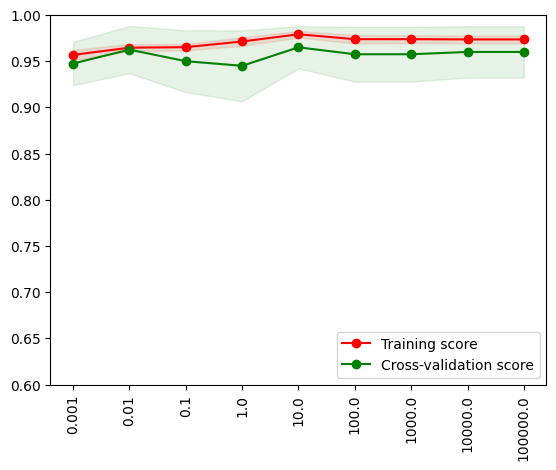

In [ ]:
from sklearn.model_selection import validation_curve

def plot_validation_curve(parameter_values, train_scores, validation_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(parameter_values, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameter_values, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(parameter_values, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(parameter_values, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.ylim(validation_scores_mean.min() - .1, train_scores_mean.max() + .1)
    plt.legend(loc=4)


training_scores, test_scores = validation_curve(SVC(kernel='linear'), X_train, y_train, param_name="C", param_range=Cs,cv=10)
plot_validation_curve(range(len(Cs)), training_scores, test_scores)
plt.xticks(range(len(Cs)), Cs,rotation='vertical');
plt.ylim([0.6, 1])
plt.show()

## Kernels polinòmic


### Grau 2

In [ ]:
knc = SVC(kernel='poly',degree =2)
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\n F1 on test set: ",sklearn.metrics.f1_score(y_test, pred))

Confusion matrix on test set:
 [[106   1]
 [ 16  48]]

 F1 on test set:  0.8495575221238937


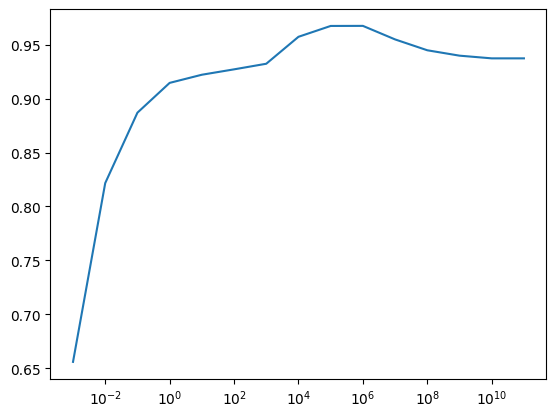

Confusion matrix on test set:
 [[104   3]
 [  6  58]]

Accuracy on test set:  0.9473684210526315

Best combination of parameters found:  {'C': 1000000.0}

Number of supports:  35 ( 19 of them have slacks)
Prop. of supports:  0.08793969849246232


In [ ]:
Cs = np.logspace(-3, 11, num=15, base=10.0)

param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='poly',degree =2) , param_grid, cv=10)
grid_search.fit(X_train,y_train)

scores = grid_search.cv_results_['mean_test_score']

plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_
knc = SVC(kernel='poly',degree =2,C=parval['C'])
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nF1 on test set: ",sklearn.metrics.f1_score(y_test, pred))
print("\nBest combination of parameters found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

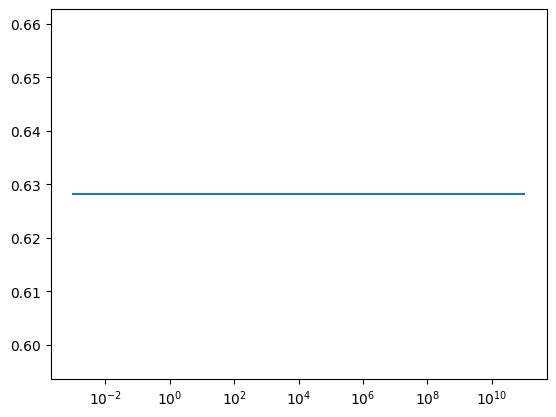

Confusion matrix on test set:
 [[107   0]
 [ 64   0]]

 f1 on test set:  0.0

Best combination of parameters found:  {'C': 0.001}

Number of supports:  298 ( 294 of them have slacks)
Prop. of supports:  0.7487437185929648


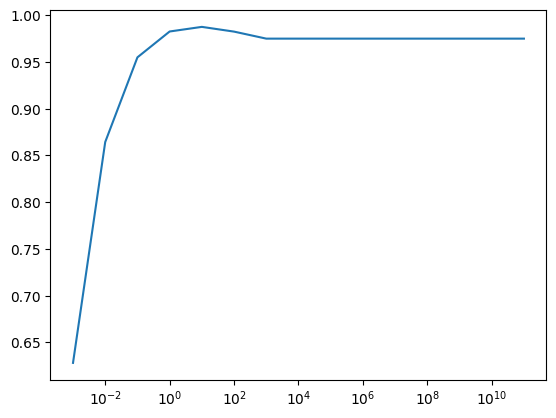

Confusion matrix on test set:
 [[103   4]
 [ 26  38]]

 f1 on test set:  0.7169811320754718

Best combination of parameters found:  {'C': 10.0}

Number of supports:  174 ( 99 of them have slacks)
Prop. of supports:  0.4371859296482412


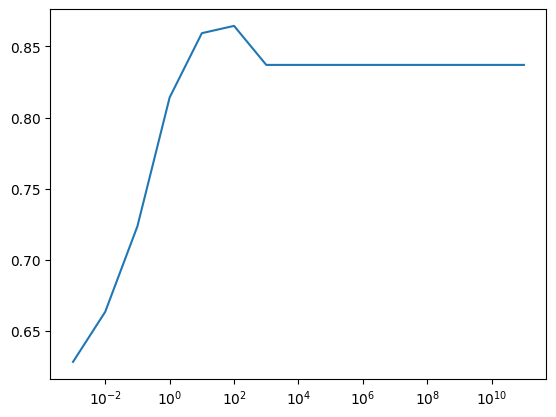

Confusion matrix on test set:
 [[98  9]
 [22 42]]

 f1 on test set:  0.7304347826086957

Best combination of parameters found:  {'C': 100.0}

Number of supports:  141 ( 33 of them have slacks)
Prop. of supports:  0.3542713567839196


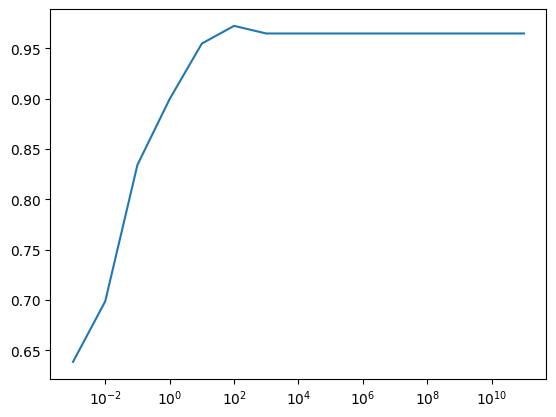

Confusion matrix on test set:
 [[98  9]
 [22 42]]

 f1 on test set:  0.7304347826086957

Best combination of parameters found:  {'C': 100.0}

Number of supports:  141 ( 33 of them have slacks)
Prop. of supports:  0.3542713567839196


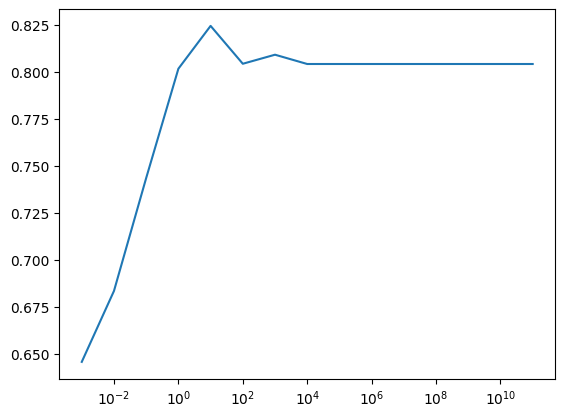

Confusion matrix on test set:
 [[103   4]
 [ 26  38]]

 f1 on test set:  0.7169811320754718

Best combination of parameters found:  {'C': 10.0}

Number of supports:  174 ( 99 of them have slacks)
Prop. of supports:  0.4371859296482412


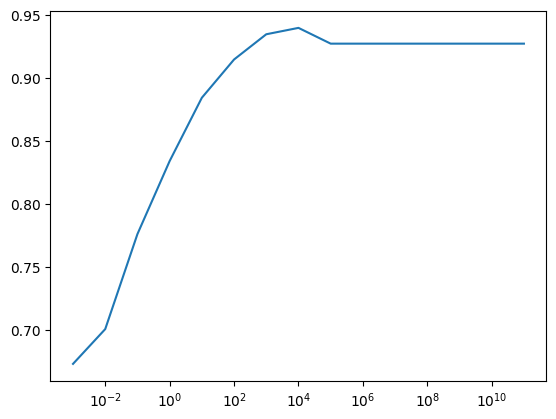

Confusion matrix on test set:
 [[95 12]
 [20 44]]

 f1 on test set:  0.7333333333333334

Best combination of parameters found:  {'C': 10000.0}

Number of supports:  124 ( 0 of them have slacks)
Prop. of supports:  0.31155778894472363


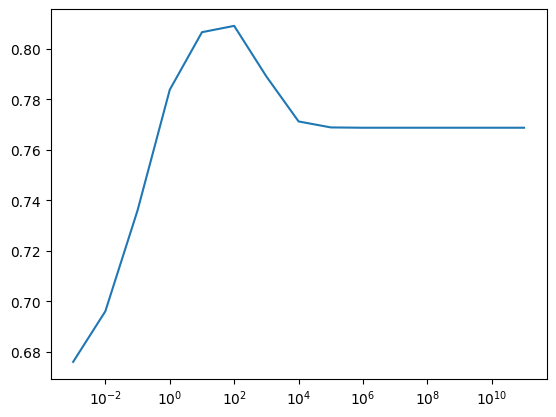

Confusion matrix on test set:
 [[98  9]
 [22 42]]

 f1 on test set:  0.7304347826086957

Best combination of parameters found:  {'C': 100.0}

Number of supports:  141 ( 33 of them have slacks)
Prop. of supports:  0.3542713567839196


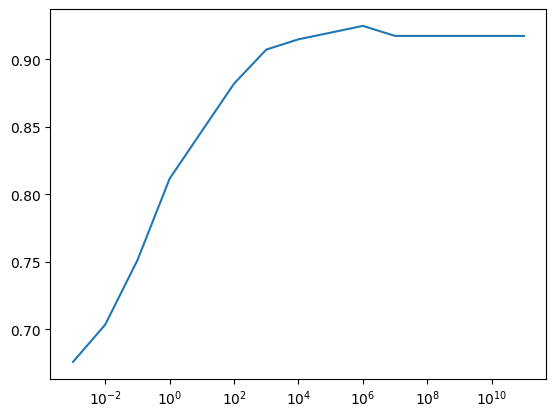

Confusion matrix on test set:
 [[95 12]
 [20 44]]

 f1 on test set:  0.7333333333333334

Best combination of parameters found:  {'C': 1000000.0}

Number of supports:  124 ( 0 of them have slacks)
Prop. of supports:  0.31155778894472363


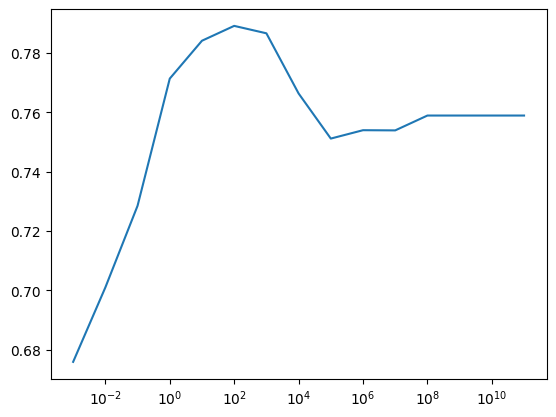

Confusion matrix on test set:
 [[98  9]
 [22 42]]

 f1 on test set:  0.7304347826086957

Best combination of parameters found:  {'C': 100.0}

Number of supports:  141 ( 33 of them have slacks)
Prop. of supports:  0.3542713567839196


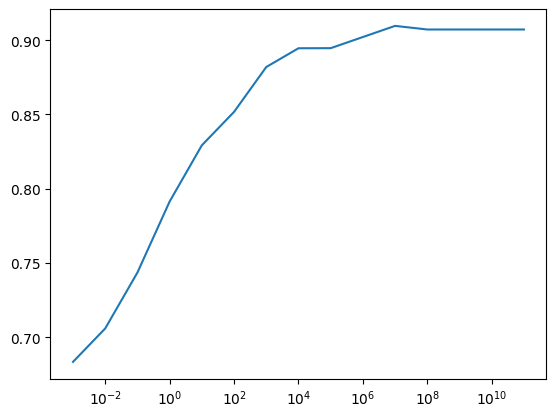

Confusion matrix on test set:
 [[95 12]
 [20 44]]

 f1 on test set:  0.7333333333333334

Best combination of parameters found:  {'C': 10000000.0}

Number of supports:  124 ( 0 of them have slacks)
Prop. of supports:  0.31155778894472363


In [ ]:
for i in range(10):
  Cs = np.logspace(-3, 11, num=15, base=10.0)

  param_grid = {'C': Cs}
  grid_search = GridSearchCV(SVC(kernel='poly',degree =i) , param_grid, cv=10)
  grid_search.fit(X_train,y_train)

  scores = grid_search.cv_results_['mean_test_score']

  plt.semilogx(Cs,scores)
  plt.show()

  parval=grid_search.best_params_
  knc = SVC(kernel='poly',degree =2,C=parval['C'])
  knc.fit(X_train, y_train)
  pred=knc.predict(X_test)
  print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
  print("\n f1 on test set: ",sklearn.metrics.f1_score(y_test, pred))
  print("\nBest combination of parameters found: ",parval)
  print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
  print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

## RBF Kernel

In [ ]:
knc = SVC()
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\n F1 on test set: ",sklearn.metrics.f1_score(y_test, pred))


Confusion matrix on test set:
 [[105   2]
 [  6  58]]

Accuracy on test set:  0.9532163742690059


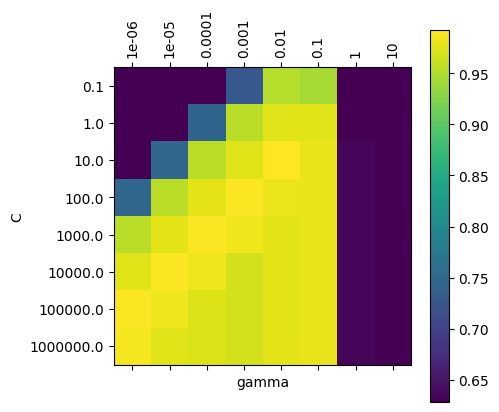


Best combination of parameters found:  {'C': 10.0, 'gamma': 0.01}


In [ ]:
# Values we will test for each parameter. When observin results, consider the limits of the
# values tested and increase them if necessary
gammas = [0.000001,0.00001, 0.0001,0.001,0.01,0.1,1,10]
Cs = np.logspace(-1, 6, num=8, base=10.0)

param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(), param_grid, cv=10)
grid_search.fit(X_train,y_train)
parval=grid_search.best_params_

# We'll show in a grid, the f1 for each combination of parameters tester
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'],rotation='vertical')
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.show()
print("\nBest combination of parameters found: ",parval)

In [ ]:
from sklearn.metrics import classification_report

# Let's apply the best combination of parameters found to the test set
parval=grid_search.best_params_
knc = SVC(C=parval['C'], gamma=parval['gamma'])
knc.fit(X_train, y_train)
pred=knc.predict(X_test)

print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\n f1 on test set: ",sklearn.metrics.f1_score(y_test, pred))
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

classification_rep = classification_report(y_test, pred)
print("\nClassification Report:\n", classification_rep)

Confusion matrix on test set:
 [[106   1]
 [  6  58]]

 f1 on test set:  0.943089430894309

Number of supports:  45 ( 16 of them have slacks)
Prop. of supports:  0.11306532663316583

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.91      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



#META


##VOTING SCHEME


### Accuracy

In [ ]:
from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

cvv=50

clf1 = GaussianNB()

params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cvv,n_jobs=-1)  # If cv is integer, by default is Stratifyed
clf.fit(X, y)
print("Best Params fo Knn=",clf.best_params_, "accuracy", clf.best_score_)
parval=clf.best_params_
clf2 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])

clf3 = DecisionTreeClassifier(criterion='entropy')


for clf, label in zip([clf1, clf2, clf3], ['Naive Bayes','Knn (3)', 'Dec. Tree', ]):
    scores = cross_val_score(clf, X, y, cv=cvv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), label))

Best Params fo Knn= {'n_neighbors': 13, 'weights': 'uniform'} accuracy 0.9324242424242424
Accuracy: 0.941 [Naive Bayes]
Accuracy: 0.932 [Knn (3)]
Accuracy: 0.938 [Dec. Tree]


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)], voting='hard')
scores = cross_val_score(eclf, X, y, cv=cvv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean() , "Majority Voting"))

Accuracy: 0.950 [Majority Voting]


In [ ]:
eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[2,1,2])
scores = cross_val_score(eclf, X, y, cv=cvv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean(), "Weighted Voting"))

Accuracy: 0.950 [Weighted Voting]


### Recall

In [ ]:


knc = KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cvv,n_jobs=-1, scoring='recall')  # If cv is integer, by default is Stratifyed
clf.fit(X, y)
print("Best Params fo Knn=",clf.best_params_, "recall", clf.best_score_)
parval=clf.best_params_
clf2 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])

clf3 = DecisionTreeClassifier(criterion='entropy')


for clf, label in zip([clf1, clf2, clf3], ['Naive Bayes','Knn (3)', 'Dec. Tree', ]):
    scores = cross_val_score(clf, X, y, cv=cvv, scoring='recall')
    print("Recall: %0.3f [%s]" % (scores.mean(), label))

Best Params fo Knn= {'n_neighbors': 7, 'weights': 'uniform'} recall 0.8859999999999999
Recall: 0.892 [Naive Bayes]
Recall: 0.886 [Knn (3)]
Recall: 0.912 [Dec. Tree]


In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_predict

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)], voting='hard')
predicted_labels = cross_val_predict(eclf, X, y, cv=cvv)
recall = recall_score(y, predicted_labels)
print("Recall: %0.3f [%s]" % (recall, "Majority Voting"))

Recall: 0.906 [Majority Voting]


In [ ]:
eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[2,1,2])
predicted_labels = cross_val_predict(eclf, X, y, cv=cvv)
recall = recall_score(y, predicted_labels)
print("Recall: %0.3f [%s]" % (recall, "Weighted Voting"))

Recall: 0.910 [Weighted Voting]


### F1-Score

In [ ]:
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cvv,n_jobs=-1, scoring='f1')  # If cv is integer, by default is Stratifyed
clf.fit(X, y)
print("Best Params fo Knn=",clf.best_params_, "f1", clf.best_score_)
parval=clf.best_params_
clf2 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])

clf3 = DecisionTreeClassifier(criterion='entropy')


for clf, label in zip([clf1, clf2, clf3], ['Naive Bayes','Knn (3)', 'Dec. Tree', ]):
    scores = cross_val_score(clf, X, y, cv=cvv, scoring='f1')
    print("F1-Score: %0.3f [%s]" % (scores.mean(), label))

Best Params fo Knn= {'n_neighbors': 13, 'weights': 'uniform'} f1 0.9012929292929293
F1-Score: 0.915 [Naive Bayes]
F1-Score: 0.901 [Knn (3)]
F1-Score: 0.905 [Dec. Tree]


In [ ]:
from sklearn.metrics import f1_score

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)], voting='hard')
predicted_labels = cross_val_predict(eclf, X, y, cv=cvv)
f1 = f1_score(y, predicted_labels)
print("F1-Score: %0.3f [%s]" % (f1, "Majority Voting"))

F1-Score: 0.930 [Majority Voting]


In [ ]:
eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[2,1,2])
predicted_labels = cross_val_predict(eclf, X, y, cv=cvv)
f1 = f1_score(y, predicted_labels)
print("F1-Score: %0.3f [%s]" % (f1, "Weighted Voting"))

F1-Score: 0.930 [Weighted Voting]


##BAGING

### Accuracy

In [ ]:
from sklearn.ensemble import BaggingClassifier

lb=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=nest), X, y, cv=cvv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb.append(scores.mean())

lb2=[]
print()
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=nest,max_features=0.35), X, y, cv=cvv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb2.append(scores.mean())

Accuracy: 0.923 [1]
Accuracy: 0.927 [2]
Accuracy: 0.955 [5]
Accuracy: 0.957 [10]
Accuracy: 0.957 [20]
Accuracy: 0.958 [50]
Accuracy: 0.963 [100]
Accuracy: 0.967 [200]

Accuracy: 0.917 [1]
Accuracy: 0.934 [2]
Accuracy: 0.943 [5]
Accuracy: 0.957 [10]
Accuracy: 0.958 [20]
Accuracy: 0.960 [50]
Accuracy: 0.964 [100]
Accuracy: 0.965 [200]


### Recall

In [ ]:
from sklearn.ensemble import BaggingClassifier

lb_recall=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=nest), X, y, cv=cvv, scoring='recall')
    print("Recall: %0.3f [%s]" % (scores.mean(), nest))
    lb_recall.append(scores.mean())

lb2_recall=[]
print()
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=nest,max_features=0.35), X, y, cv=cvv, scoring='recall')
    print("Recall: %0.3f [%s]" % (scores.mean(), nest))
    lb2_recall.append(scores.mean())

Recall: 0.926 [1]
Recall: 0.870 [2]
Recall: 0.930 [5]
Recall: 0.908 [10]
Recall: 0.937 [20]
Recall: 0.936 [50]
Recall: 0.941 [100]
Recall: 0.935 [200]

Recall: 0.897 [1]
Recall: 0.840 [2]
Recall: 0.914 [5]
Recall: 0.898 [10]
Recall: 0.922 [20]
Recall: 0.931 [50]
Recall: 0.946 [100]
Recall: 0.936 [200]


### F1-Score

In [ ]:
from sklearn.ensemble import BaggingClassifier

lb_f1=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=nest), X, y, cv=cvv, scoring='f1')
    print("F1-Score: %0.3f [%s]" % (scores.mean(), nest))
    lb_f1.append(scores.mean())

lb2_f1=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=nest,max_features=0.35), X, y, cv=cvv, scoring='f1')
    print("F1-Score: %0.3f [%s]" % (scores.mean(), nest))
    lb2_f1.append(scores.mean())

F1-Score: 0.896 [1]
F1-Score: 0.895 [2]
F1-Score: 0.926 [5]
F1-Score: 0.937 [10]
F1-Score: 0.933 [20]
F1-Score: 0.945 [50]
F1-Score: 0.948 [100]
F1-Score: 0.955 [200]
F1-Score: 0.929 [1]
F1-Score: 0.886 [2]
F1-Score: 0.931 [5]
F1-Score: 0.925 [10]
F1-Score: 0.946 [20]
F1-Score: 0.949 [50]
F1-Score: 0.948 [100]
F1-Score: 0.947 [200]


##RANDOM FOREST

### Accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier

lrf=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(RandomForestClassifier(n_estimators=nest), X, y, cv=cvv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lrf.append(scores.mean())

Accuracy: 0.928 [1]
Accuracy: 0.922 [2]
Accuracy: 0.952 [5]
Accuracy: 0.962 [10]
Accuracy: 0.965 [20]
Accuracy: 0.967 [50]
Accuracy: 0.966 [100]
Accuracy: 0.962 [200]


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

lext=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(ExtraTreesClassifier(n_estimators=nest), X, y, cv=cvv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lext.append(scores.mean())

Accuracy: 0.923 [1]
Accuracy: 0.917 [2]
Accuracy: 0.956 [5]
Accuracy: 0.962 [10]
Accuracy: 0.963 [20]
Accuracy: 0.970 [50]
Accuracy: 0.965 [100]
Accuracy: 0.968 [200]


### Recall

In [ ]:
from sklearn.ensemble import RandomForestClassifier

lrf_recall=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(RandomForestClassifier(n_estimators=nest), X, y, cv=cvv, scoring='recall')
    print("Recall: %0.3f [%s]" % (scores.mean(), nest))
    lrf_recall.append(scores.mean())

Recall: 0.920 [1]
Recall: 0.860 [2]
Recall: 0.924 [5]
Recall: 0.920 [10]
Recall: 0.926 [20]
Recall: 0.945 [50]
Recall: 0.931 [100]
Recall: 0.931 [200]


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

lext_recall=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(ExtraTreesClassifier(n_estimators=nest), X, y, cv=cvv, scoring='recall')
    print("Recall: %0.3f [%s]" % (scores.mean(), nest))
    lext_recall.append(scores.mean())

Recall: 0.883 [1]
Recall: 0.809 [2]
Recall: 0.935 [5]
Recall: 0.923 [10]
Recall: 0.925 [20]
Recall: 0.944 [50]
Recall: 0.944 [100]
Recall: 0.934 [200]


### F1-Score

In [ ]:
from sklearn.ensemble import RandomForestClassifier

lrf_f1=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(RandomForestClassifier(n_estimators=nest), X, y, cv=cvv, scoring='f1')
    print("F1-Score: %0.3f [%s]" % (scores.mean(), nest))
    lrf_f1.append(scores.mean())

F1-Score: 0.883 [1]
F1-Score: 0.894 [2]
F1-Score: 0.928 [5]
F1-Score: 0.934 [10]
F1-Score: 0.942 [20]
F1-Score: 0.938 [50]
F1-Score: 0.957 [100]
F1-Score: 0.948 [200]


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

lext_f1=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(ExtraTreesClassifier(n_estimators=nest), X, y, cv=cvv, scoring='f1')
    print("F1-Score: %0.3f [%s]" % (scores.mean(), nest))
    lext_f1.append(scores.mean())

F1-Score: 0.887 [1]
F1-Score: 0.889 [2]
F1-Score: 0.937 [5]
F1-Score: 0.946 [10]
F1-Score: 0.952 [20]
F1-Score: 0.936 [50]
F1-Score: 0.961 [100]
F1-Score: 0.954 [200]


##BOOSTING


### Accuracy

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

lboo=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(n_estimators=nest), X, y, cv=cvv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboo.append(scores.mean())

Accuracy: 0.899 [1]
Accuracy: 0.899 [2]
Accuracy: 0.951 [5]
Accuracy: 0.955 [10]
Accuracy: 0.967 [20]
Accuracy: 0.967 [50]
Accuracy: 0.972 [100]
Accuracy: 0.974 [200]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

lboodt=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=nest), X, y, cv=cvv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboodt.append(scores.mean())

Accuracy: 0.934 [1]
Accuracy: 0.918 [2]
Accuracy: 0.948 [5]
Accuracy: 0.956 [10]
Accuracy: 0.965 [20]
Accuracy: 0.972 [50]
Accuracy: 0.971 [100]
Accuracy: 0.969 [200]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

lgbboo=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(GradientBoostingClassifier(n_estimators=nest), X, y, cv=cvv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lgbboo.append(scores.mean())

Accuracy: 0.628 [1]
Accuracy: 0.628 [2]
Accuracy: 0.939 [5]
Accuracy: 0.943 [10]
Accuracy: 0.953 [20]
Accuracy: 0.962 [50]
Accuracy: 0.964 [100]
Accuracy: 0.967 [200]


### Recall

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

lboo_recall=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(n_estimators=nest), X, y, cv=cvv, scoring='recall')
    print("Recall: %0.3f [%s]" % (scores.mean(), nest))
    lboo_recall.append(scores.mean())

Recall: 0.810 [1]
Recall: 0.837 [2]
Recall: 0.945 [5]
Recall: 0.930 [10]
Recall: 0.950 [20]
Recall: 0.944 [50]
Recall: 0.953 [100]
Recall: 0.958 [200]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

lboodt_recall=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=nest), X, y, cv=cvv, scoring='recall')
    print("Recall: %0.3f [%s]" % (scores.mean(), nest))
    lboodt_recall.append(scores.mean())

Recall: 0.902 [1]
Recall: 0.867 [2]
Recall: 0.899 [5]
Recall: 0.913 [10]
Recall: 0.954 [20]
Recall: 0.945 [50]
Recall: 0.949 [100]
Recall: 0.950 [200]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

lgbboo_recall=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(GradientBoostingClassifier(n_estimators=nest), X, y, cv=cvv, scoring='recall')
    print("Recall: %0.3f [%s]" % (scores.mean(), nest))
    lgbboo_recall.append(scores.mean())

Recall: 0.000 [1]
Recall: 0.000 [2]
Recall: 0.879 [5]
Recall: 0.888 [10]
Recall: 0.931 [20]
Recall: 0.935 [50]
Recall: 0.945 [100]
Recall: 0.949 [200]


### F1-Score

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

lboo_f1=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(n_estimators=nest), X, y, cv=cvv, scoring='f1')
    print("F1-Score: %0.3f [%s]" % (scores.mean(), nest))
    lboo_f1.append(scores.mean())

F1-Score: 0.845 [1]
F1-Score: 0.843 [2]
F1-Score: 0.936 [5]
F1-Score: 0.940 [10]
F1-Score: 0.955 [20]
F1-Score: 0.955 [50]
F1-Score: 0.960 [100]
F1-Score: 0.963 [200]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

lboodt_f1=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=nest), X, y, cv=cvv, scoring='f1')
    print("F1-Score: %0.3f [%s]" % (scores.mean(), nest))
    lboodt_f1.append(scores.mean())

F1-Score: 0.893 [1]
F1-Score: 0.874 [2]
F1-Score: 0.928 [5]
F1-Score: 0.943 [10]
F1-Score: 0.932 [20]
F1-Score: 0.951 [50]
F1-Score: 0.956 [100]
F1-Score: 0.954 [200]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

lgbboo_f1=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(GradientBoostingClassifier(n_estimators=nest), X, y, cv=cvv, scoring='f1')
    print("F1-Score: %0.3f [%s]" % (scores.mean(), nest))
    lgbboo_f1.append(scores.mean())

F1-Score: 0.000 [1]
F1-Score: 0.000 [2]
F1-Score: 0.909 [5]
F1-Score: 0.913 [10]
F1-Score: 0.936 [20]
F1-Score: 0.945 [50]
F1-Score: 0.954 [100]
F1-Score: 0.957 [200]


## Comparision plots between ML types

### Accuracy plot

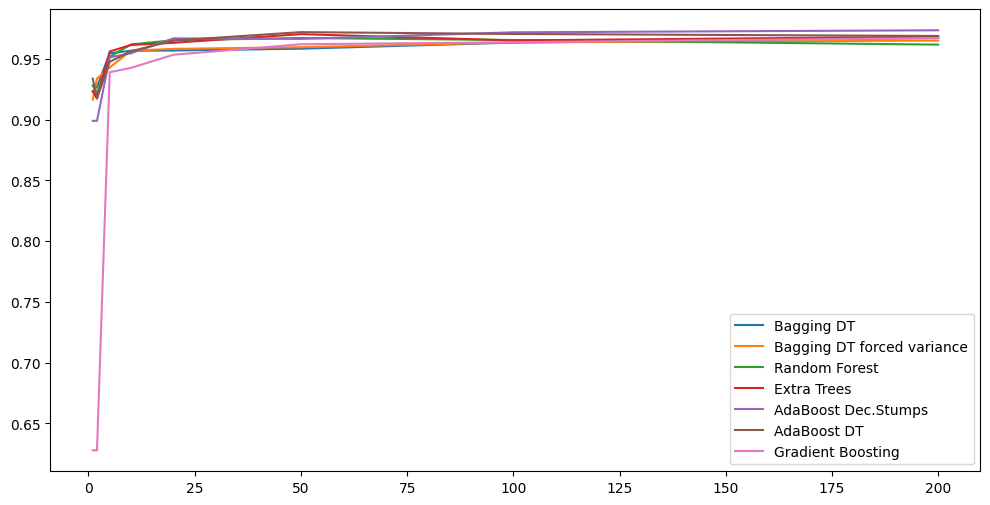

In [ ]:
import  matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20,50,100,200],lb,label="Bagging DT")
plt.plot([1,2,5,10,20,50,100,200],lb2,label="Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100,200],lrf,label="Random Forest")
plt.plot([1,2,5,10,20,50,100,200],lext,label="Extra Trees")
plt.plot([1,2,5,10,20,50,100,200],lboo,label="AdaBoost Dec.Stumps")
plt.plot([1,2,5,10,20,50,100,200],lboodt,label="AdaBoost DT")
plt.plot([1,2,5,10,20,50,100,200],lgbboo,label="Gradient Boosting")
plt.legend(loc='lower right')

plt.show()

### Recall plot

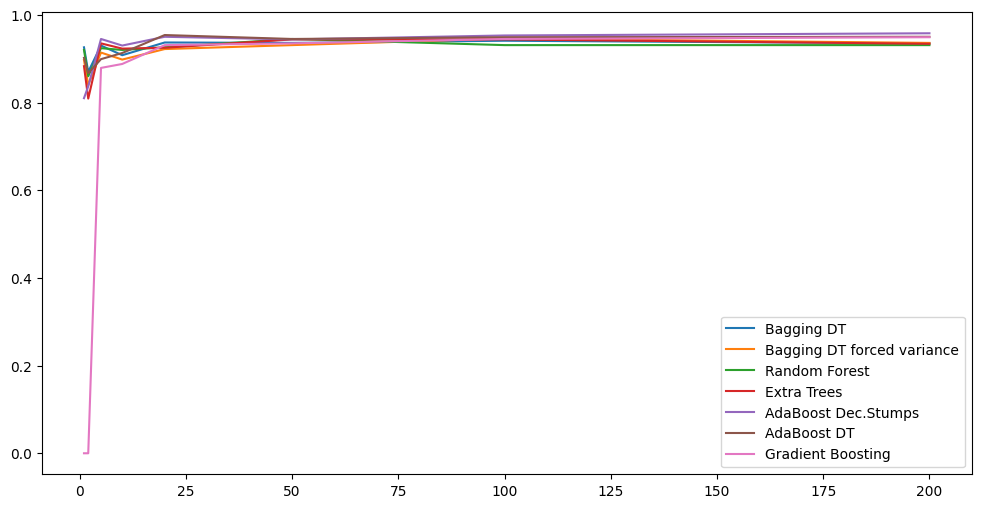

In [ ]:
import  matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20,50,100,200],lb_recall,label="Bagging DT")
plt.plot([1,2,5,10,20,50,100,200],lb2_recall,label="Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100,200],lrf_recall,label="Random Forest")
plt.plot([1,2,5,10,20,50,100,200],lext_recall,label="Extra Trees")
plt.plot([1,2,5,10,20,50,100,200],lboo_recall,label="AdaBoost Dec.Stumps")
plt.plot([1,2,5,10,20,50,100,200],lboodt_recall,label="AdaBoost DT")
plt.plot([1,2,5,10,20,50,100,200],lgbboo_recall,label="Gradient Boosting")
plt.legend(loc='lower right')

plt.show()

### F1-Score plot

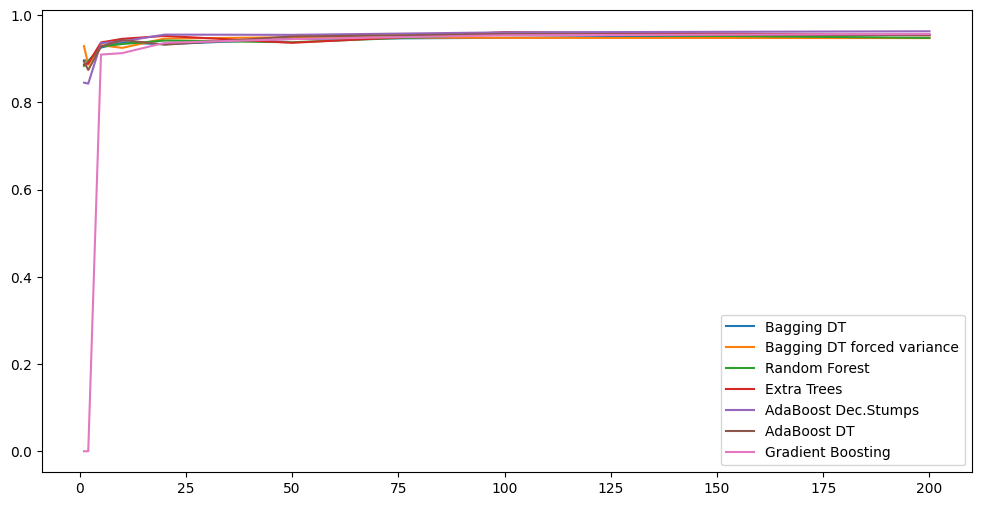

In [ ]:
import  matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20,50,100,200],lb_f1,label="Bagging DT")
plt.plot([1,2,5,10,20,50,100,200],lb2_f1,label="Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100,200],lrf_f1,label="Random Forest")
plt.plot([1,2,5,10,20,50,100,200],lext_f1,label="Extra Trees")
plt.plot([1,2,5,10,20,50,100,200],lboo_f1,label="AdaBoost Dec.Stumps")
plt.plot([1,2,5,10,20,50,100,200],lboodt_f1,label="AdaBoost DT")
plt.plot([1,2,5,10,20,50,100,200],lgbboo_f1,label="Gradient Boosting")
plt.legend(loc='lower right')

plt.show()

## Feature selection with forest of trees

In [ ]:
from sklearn.feature_selection import SelectFromModel

clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X, y)
print(clf.feature_importances_)

[0.02736037 0.01370077 0.07093239 0.0711743  0.00665894 0.01427768
 0.03570962 0.10578691 0.00332718 0.00505066 0.00509348 0.00397265
 0.01719819 0.02871149 0.00467402 0.00386438 0.00373995 0.00313723
 0.00305781 0.00300135 0.12308986 0.01967438 0.14284412 0.11572233
 0.01739366 0.01549114 0.03582129 0.08503717 0.00910789 0.00538879]


### Accuracy

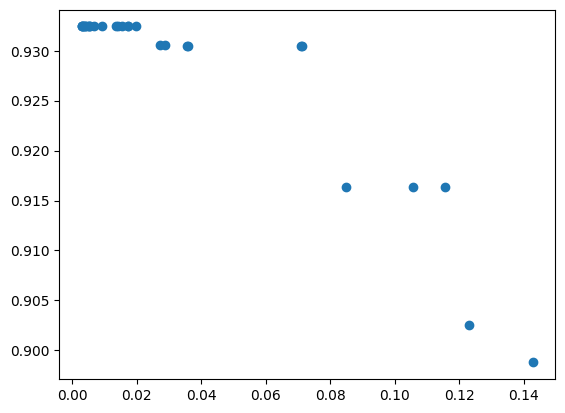

Best threshold:  0.013700766275679226


In [ ]:
thresholds=clf.feature_importances_

l=[]
lparval=[]
for threshold in thresholds:
    model = SelectFromModel(clf, prefit=True, threshold=threshold)
    X_new = model.transform(X)
    params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
    knc = KNeighborsClassifier()
    clf2 = GridSearchCV(knc, param_grid=params,cv=cvv,n_jobs=-1)  # If cv is integer, by default is Stratifyed
    clf2.fit(X, y)
    parval=clf2.best_params_
    clf3 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
    acc = np.mean(cross_val_score(clf3, X=X_new, y=y, cv=cvv, scoring='accuracy'))
    l.append(acc)
    lparval.append(parval)

plt.scatter(thresholds,l)
plt.show()

print('Best threshold: ',thresholds[np.argmax(l)])

### Recall

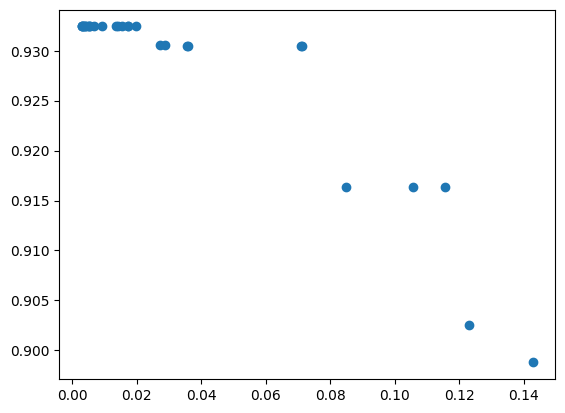

Best threshold:  0.013700766275679226


In [ ]:
thresholds=clf.feature_importances_

l_recall=[]
lparval_recall=[]
for threshold in thresholds:
    model = SelectFromModel(clf, prefit=True, threshold=threshold)
    X_new = model.transform(X)
    params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
    knc = KNeighborsClassifier()
    clf2 = GridSearchCV(knc, param_grid=params,cv=cvv,n_jobs=-1)  # If cv is integer, by default is Stratifyed
    clf2.fit(X, y)
    parval=clf2.best_params_
    clf3 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
    acc = np.mean(cross_val_score(clf3, X=X_new, y=y, cv=cvv, scoring='recall'))
    l_recall.append(acc)
    lparval_recall.append(parval)

plt.scatter(thresholds,l)
plt.show()

print('Best threshold: ',thresholds[np.argmax(l)])

### F1-Score

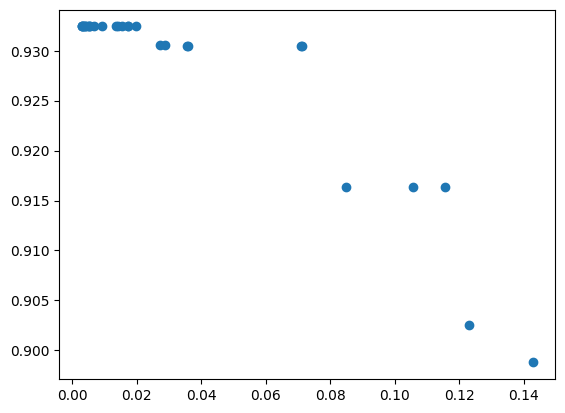

Best threshold:  0.013700766275679226


In [ ]:
thresholds=clf.feature_importances_

l_f1=[]
lparval_f1=[]
for threshold in thresholds:
    model = SelectFromModel(clf, prefit=True, threshold=threshold)
    X_new = model.transform(X)
    params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
    knc = KNeighborsClassifier()
    clf2 = GridSearchCV(knc, param_grid=params,cv=cvv,n_jobs=-1)  # If cv is integer, by default is Stratifyed
    clf2.fit(X, y)
    parval=clf2.best_params_
    clf3 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
    acc = np.mean(cross_val_score(clf3, X=X_new, y=y, cv=cvv, scoring='f1'))
    l_f1.append(acc)
    lparval_f1.append(parval)

plt.scatter(thresholds,l)
plt.show()

print('Best threshold: ',thresholds[np.argmax(l)])

### All together

In [ ]:
parval=lparval[np.argmax(l)]
model = SelectFromModel(clf, prefit=True, threshold=thresholds[np.argmax(l)])
X_new = model.transform(X)

print('Accuracy:')
print('   Original: ', np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X=X, y=y, cv=cvv, scoring='accuracy')))
print('   With FS: ', np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights']), X=X_new, y=y, cv=cvv, scoring='accuracy')))


parval=lparval_recall[np.argmax(l)]
model = SelectFromModel(clf, prefit=True, threshold=thresholds[np.argmax(l)])
X_new = model.transform(X)

print('Recall:')
print('   Original: ', np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X=X, y=y, cv=cvv, scoring='recall')))
print('   With FS: ', np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights']), X=X_new, y=y, cv=cvv, scoring='recall')))


parval=lparval_f1[np.argmax(l)]
model = SelectFromModel(clf, prefit=True, threshold=thresholds[np.argmax(l)])
X_new = model.transform(X)

print('F1-Score:')
print('   Original: ', np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X=X, y=y, cv=cvv, scoring='f1')))
print('   With FS: ', np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights']), X=X_new, y=y, cv=cvv, scoring='f1')))

Accuracy:
   Original:  0.9140909090909091
   With FS:  0.9324242424242424
Recall:
   Original:  0.8590000000000001
   With FS:  0.879
F1-Score:
   Original:  0.8773174603174603
   With FS:  0.9012929292929293
